In [1]:
import params
from google.cloud import datastore, storage, logging
import time
import pickle
import hashlib
import sys
import time
import multiprocessing as mp
import sys
import dataAck
import curveTreeDB

def getValidModelsByTicker(db, ticker):
    while True:
        try:
            datastore_client = datastore.Client('money-maker-1236')
            query = datastore_client.query(kind=db)
            
            query.add_filter("ticker", '=', ticker)
            query.add_filter("IS_SHARPE DIFFERENCE SLIPPAGE", '>', 0.0)
            retrievedModels = list(query.fetch())
            return retrievedModels
        except:
            print("DATA SOURCE RETRIEVAL ERROR:", str(sys.exc_info()))
            return 


In [125]:
def getPertinentDataModels(db):
    while True:
        try:
            datastore_client = datastore.Client('money-maker-1236')
            query = datastore_client.query(kind=db)
#             query.add_filter("numberOfPredictors", "=", 2)
            query.add_filter("IS_ACTIVE PROFITABILITY", '>', 0.55)
            retrievedModels = list(query.fetch())
            return retrievedModels
        except:
            print("DATA SOURCE RETRIEVAL ERROR:", str(sys.exc_info()))
            return 

In [126]:
allValidModels = getPertinentDataModels(params.treeModels)

In [153]:
import params
import curveTreeDB
allModels = curveTreeDB.getValidModels(params.treeModels, returnEntireObject = True)

In [31]:
allValidModels = getValidModelsByTicker(params.treeModels, "USO")
# allValidModels = curveTreeDB.getValidModels(params.treeModels, returnEntireObject = True)

In [127]:
quickModels = []
predLength = {}
for mod in allValidModels:
#     if mod["predictionLength"] < 10:
#         continue
    if mod["predictionLength"] not in predLength:
        predLength[mod["predictionLength"]] = []
    predLength[mod["predictionLength"]].append(abs(mod["OOS_BETA"] - mod["IS_BETA"]))
#     print(mod["IS_BETA"], mod["OOS_BETA"], mod["predictionLength"])
    quickModels.append(mod)

# for item in sorted(predLength):
#     print(item, sum(predLength[item])/len(predLength[item]))

In [128]:
len(quickModels)

57414

In [132]:
import pandas as pd
cleanedModels = []
seenTickers = {}
seenPredictors = {}
tickerSharpe = {}

for item in quickModels:
#     del item["model"]
#     try:
#         del item["series"]
#     except:
#         pass
#     try:
#         print(item["IS_PROFITABILITY"], item["lastXDays"], item["IS_BETA"], item["OOS_BETA"])
#     except:
#         continue
#     if item["IS_SHARPE DIFFERENCE SLIPPAGE"] < 0.0:
#         continue
    
#     del item["ticker"]
    if item["IS_PROFITABILITY"] < 0.5:# or item["IS_BETA"] > 0.1:# or item["IS_ACTIVITY"] < 0.6 or item["IS_SHARPE"] < 1.0 or item["IS_PROFITABILITY"] < 0.45:
        continue
    
    
    if item["numberOfPredictors"] not in seenPredictors:
        seenPredictors[item["numberOfPredictors"]] = {"better":0, "greaterThanZero":0, "total":0}
    
    seenPredictors[item["numberOfPredictors"]]["total"] += 1
    if item["OOS_SHARPE"] > item["OOS_FACTOR SHARPE"]:
#         print(item["ticker"], item["OOS_SHARPE"], item["OOS_FACTOR SHARPE"] )
        seenPredictors[item["numberOfPredictors"]]["better"] += 1
    if item["OOS_SHARPE"] > 0:
        seenPredictors[item["numberOfPredictors"]]["greaterThanZero"] += 1
        print(item["OOS_SHARPE"], item["OOS_FACTOR SHARPE"])
        print(item["OOS_ANNUALIZED RETURN"])
    
    if item["ticker"] not in seenTickers:
        seenTickers[item["ticker"]] = 0
    if item["ticker"] not in tickerSharpe:
        tickerSharpe[item["ticker"]] = item["OOS_FACTOR SHARPE"]
    seenTickers[item["ticker"]] += 1
    itemKeys= list(item.keys())
    for key in itemKeys:
        if key.startswith("OOS") and key != "OOS_FACTOR SHARPE" and key != "OOS_PROFITABILITY" and key != "OOS_SHARPE DIFFERENCE SLIPPAGE" and key != "OOS_SHARPE" and key != "OOS_BETA" and key != "OOS_ANNUALIZED RETURN":
            del item[key]
    cleanedModels.append(item)
print(seenTickers)
print(tickerSharpe)
for predictors in sorted(seenPredictors):
    print(predictors, seenPredictors[predictors]["total"], seenPredictors[predictors]["better"]/seenPredictors[predictors]["total"], seenPredictors[predictors]["greaterThanZero"]/seenPredictors[predictors]["total"])

0.8903845670461028 1.5330777804443185
0.04676495440559125
0.8717422026198409 0.8316337103503116
0.06745814355967483
2.248179626603492 2.0035578522241315
0.18857309121264465
1.0562963779930483 1.5604650856438584
0.05736991549429593
0.24634552584558672 0.9317750374172077
0.010973529891892708
1.137024205463954 0.955933477266156
0.06065635323171992
0.9636988281470569 0.834997860158905
0.044062813813561696
0.34840963059437546 1.7235247446419266
0.013875636016536186
0.7795994089365337 2.008025687382909
0.05771258216460873
1.4480029189300287 1.5913849968276024
0.0795692190441204
0.003324793806857789 1.6771757841307704
-0.0007463182452021044
0.003502181363103206 1.0096660965073598
-0.00084117736140632
1.251167512930544 1.7239707452457769
0.06690123219925237
0.9177159834892407 1.90815532652085
0.043376099548065206
0.5166603975801712 2.0115983703389664
0.039477913605464154
1.3565789367908536 1.1923084354055107
0.08014312948580993
0.038070969025658485 1.0084722684619787
0.000574992255107265
0.838

In [130]:
len(cleanedModels)

816

IS_25TH PERCENTILE RELATIVE SHARPE DIFFERENCE OOS_PROFITABILITY


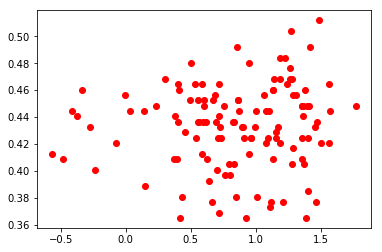

IS_25TH PERCENTILE RELATIVE SHARPE DIFFERENCE OOS_SHARPE DIFFERENCE SLIPPAGE


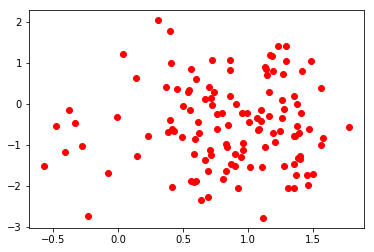

IS_25TH PERCENTILE RELATIVE SHARPE DIFFERENCE OOS_SHARPE


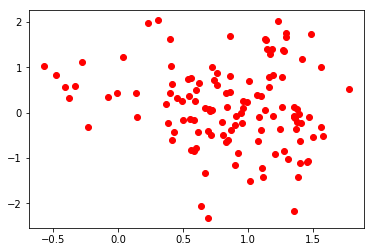

IS_25TH PERCENTILE RELATIVE SHARPE DIFFERENCE OOS_BETA


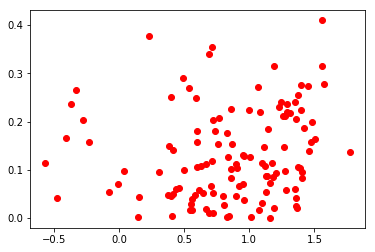

IS_25TH PERCENTILE RELATIVE SHARPE DIFFERENCE OOS_ANNUALIZED RETURN


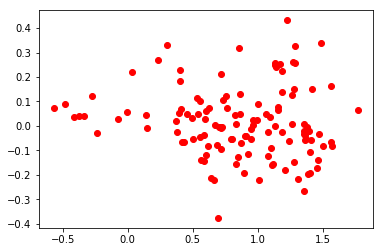

IS_25TH PERCENTILE RELATIVE SHARPE DIFFERENCE OOS_FACTOR SHARPE


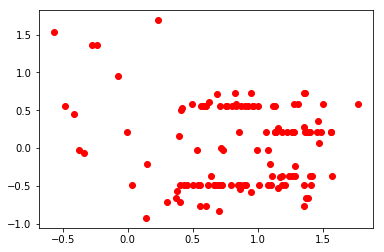

IS_25TH PERCENTILE SHARPE OOS_PROFITABILITY


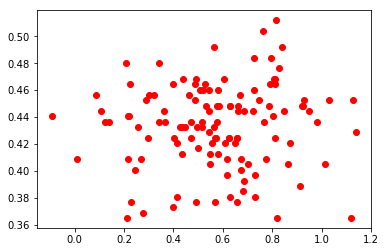

IS_25TH PERCENTILE SHARPE OOS_SHARPE DIFFERENCE SLIPPAGE


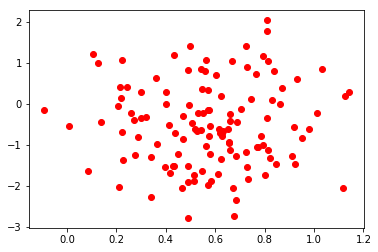

IS_25TH PERCENTILE SHARPE OOS_SHARPE


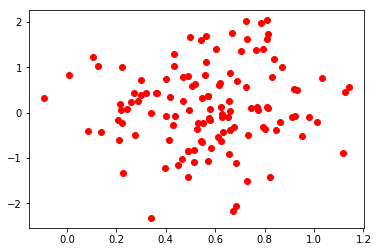

IS_25TH PERCENTILE SHARPE OOS_BETA


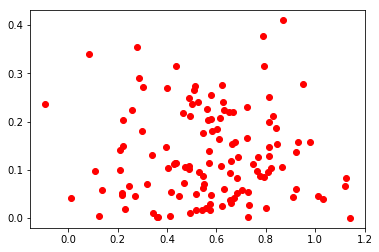

IS_25TH PERCENTILE SHARPE OOS_ANNUALIZED RETURN


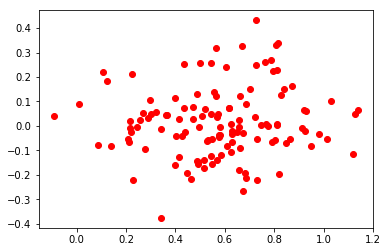

IS_25TH PERCENTILE SHARPE OOS_FACTOR SHARPE


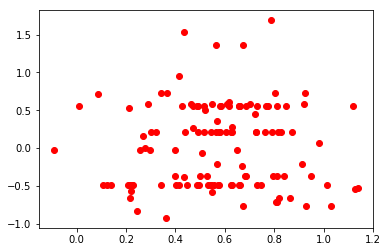

IS_25TH PERCENTILE SHARPE DIFFERENCE OOS_PROFITABILITY


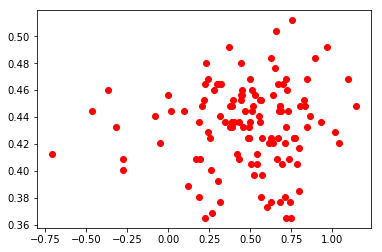

IS_25TH PERCENTILE SHARPE DIFFERENCE OOS_SHARPE DIFFERENCE SLIPPAGE


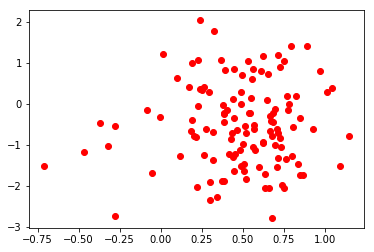

IS_25TH PERCENTILE SHARPE DIFFERENCE OOS_SHARPE


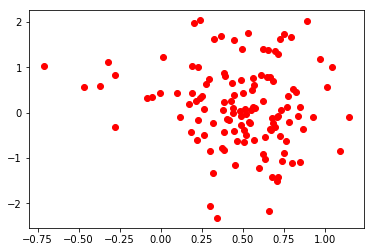

IS_25TH PERCENTILE SHARPE DIFFERENCE OOS_BETA


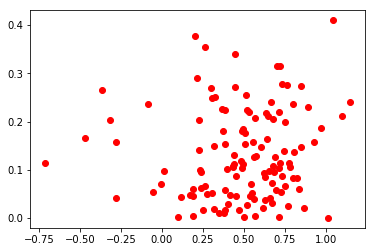

IS_25TH PERCENTILE SHARPE DIFFERENCE OOS_ANNUALIZED RETURN


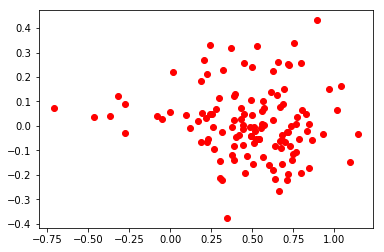

IS_25TH PERCENTILE SHARPE DIFFERENCE OOS_FACTOR SHARPE


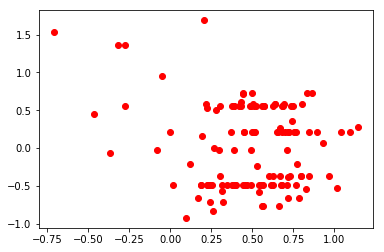

IS_ACTIVE PROFITABILITY OOS_PROFITABILITY


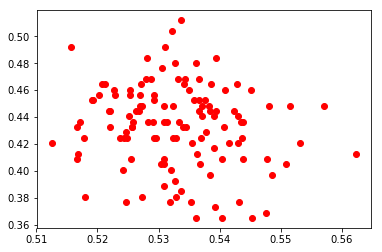

IS_ACTIVE PROFITABILITY OOS_SHARPE DIFFERENCE SLIPPAGE


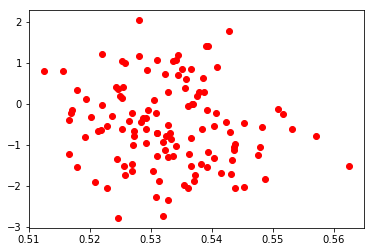

IS_ACTIVE PROFITABILITY OOS_SHARPE


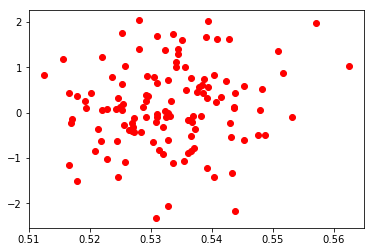

IS_ACTIVE PROFITABILITY OOS_BETA


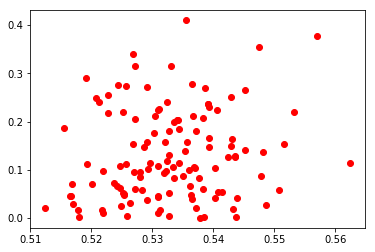

IS_ACTIVE PROFITABILITY OOS_ANNUALIZED RETURN


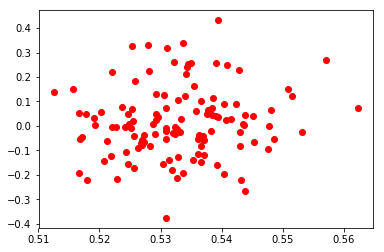

IS_ACTIVE PROFITABILITY OOS_FACTOR SHARPE


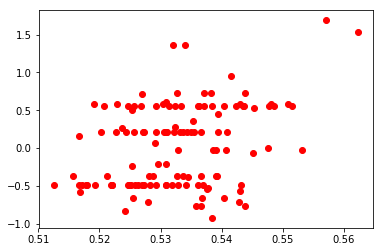

IS_ACTIVE PROFITABILITY SLIPPAGE OOS_PROFITABILITY


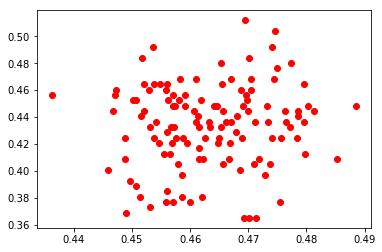

IS_ACTIVE PROFITABILITY SLIPPAGE OOS_SHARPE DIFFERENCE SLIPPAGE


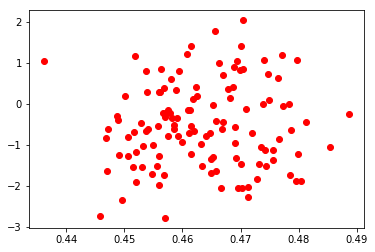

IS_ACTIVE PROFITABILITY SLIPPAGE OOS_SHARPE


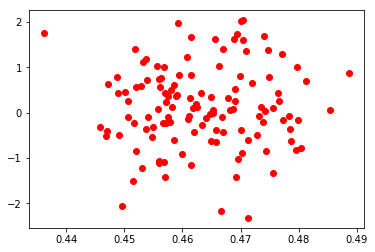

IS_ACTIVE PROFITABILITY SLIPPAGE OOS_BETA


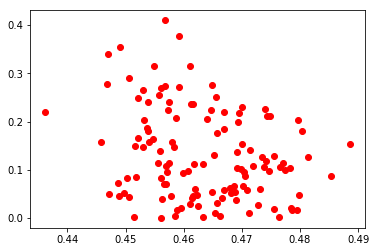

IS_ACTIVE PROFITABILITY SLIPPAGE OOS_ANNUALIZED RETURN


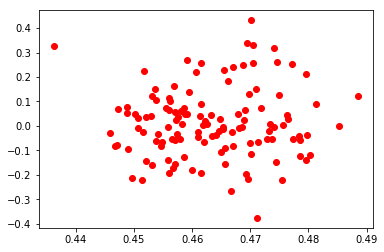

IS_ACTIVE PROFITABILITY SLIPPAGE OOS_FACTOR SHARPE


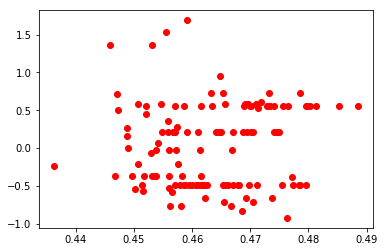

IS_ACTIVITY OOS_PROFITABILITY


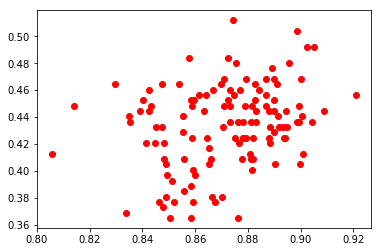

IS_ACTIVITY OOS_SHARPE DIFFERENCE SLIPPAGE


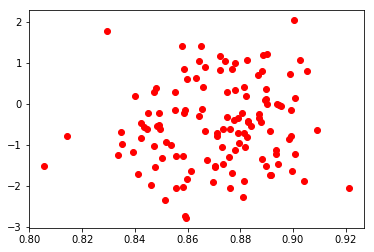

IS_ACTIVITY OOS_SHARPE


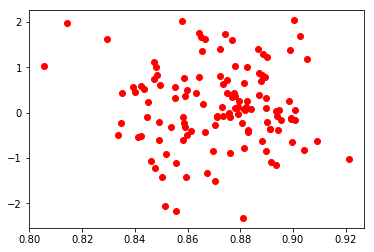

IS_ACTIVITY OOS_BETA


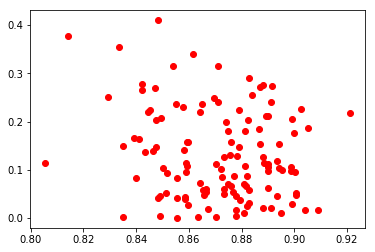

IS_ACTIVITY OOS_ANNUALIZED RETURN


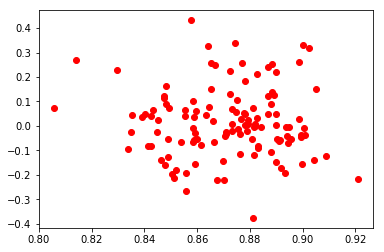

IS_ACTIVITY OOS_FACTOR SHARPE


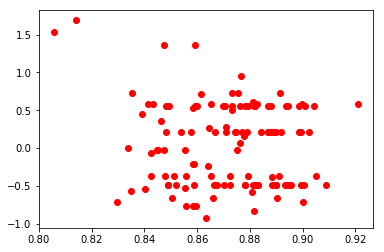

IS_ALPHA OOS_PROFITABILITY


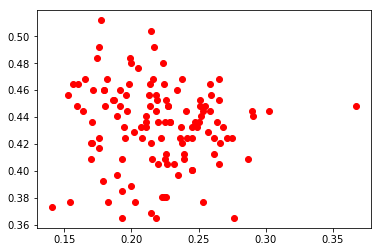

IS_ALPHA OOS_SHARPE DIFFERENCE SLIPPAGE


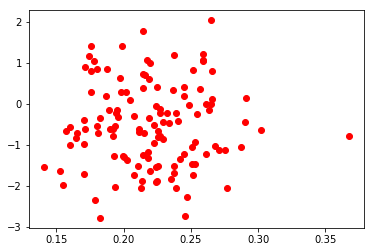

IS_ALPHA OOS_SHARPE


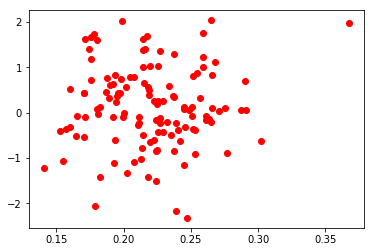

IS_ALPHA OOS_BETA


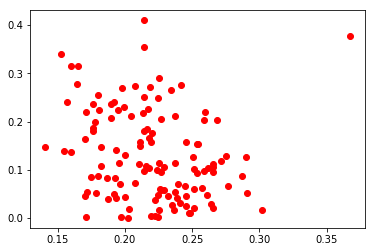

IS_ALPHA OOS_ANNUALIZED RETURN


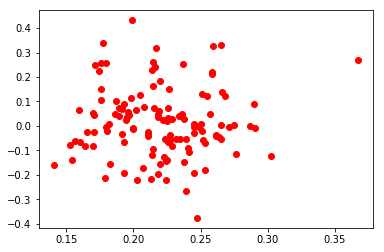

IS_ALPHA OOS_FACTOR SHARPE


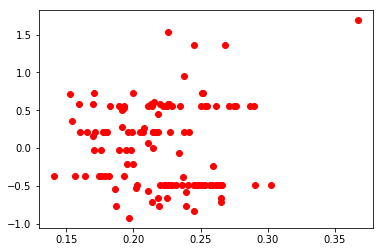

IS_ALPHA SLIPPAGE OOS_PROFITABILITY


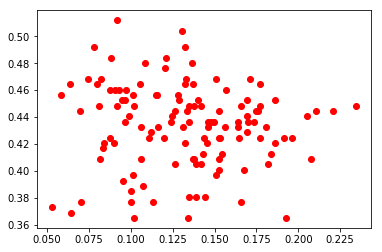

IS_ALPHA SLIPPAGE OOS_SHARPE DIFFERENCE SLIPPAGE


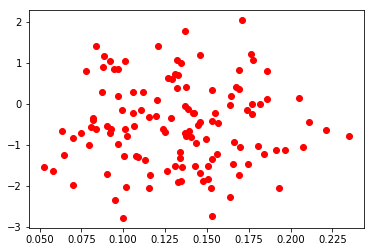

IS_ALPHA SLIPPAGE OOS_SHARPE


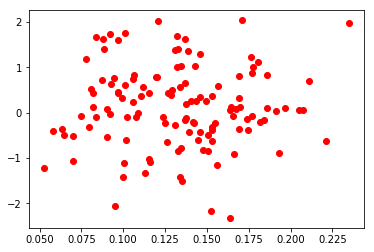

IS_ALPHA SLIPPAGE OOS_BETA


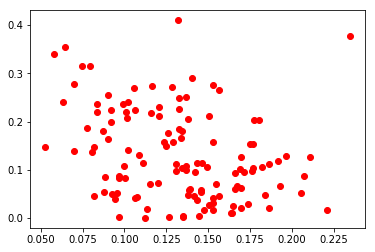

IS_ALPHA SLIPPAGE OOS_ANNUALIZED RETURN


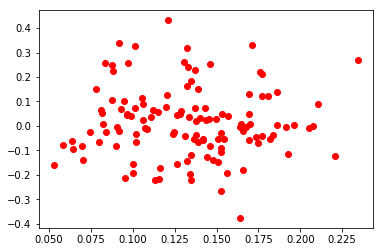

IS_ALPHA SLIPPAGE OOS_FACTOR SHARPE


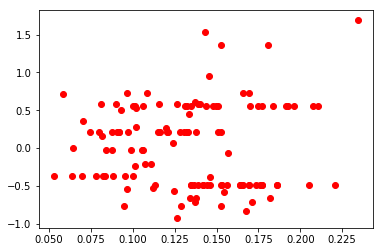

IS_ANNUALIZED RETURN OOS_PROFITABILITY


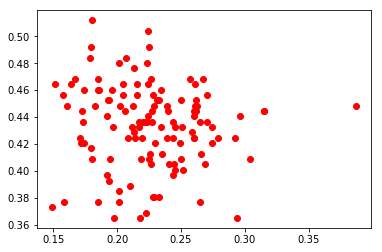

IS_ANNUALIZED RETURN OOS_SHARPE DIFFERENCE SLIPPAGE


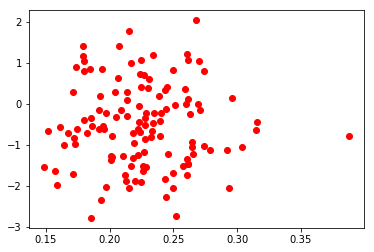

IS_ANNUALIZED RETURN OOS_SHARPE


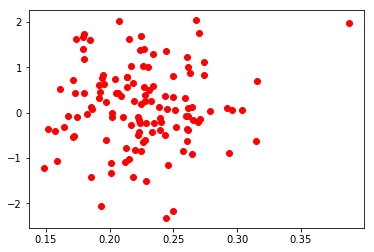

IS_ANNUALIZED RETURN OOS_BETA


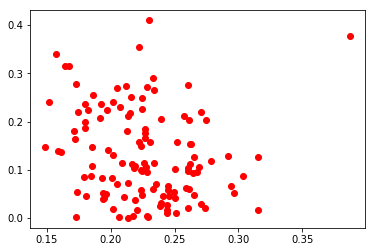

IS_ANNUALIZED RETURN OOS_ANNUALIZED RETURN


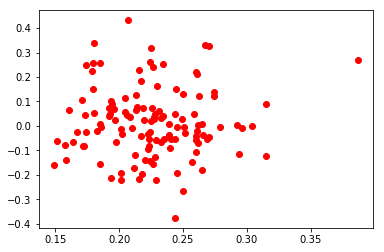

IS_ANNUALIZED RETURN OOS_FACTOR SHARPE


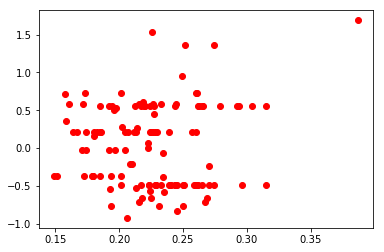

IS_BETA OOS_PROFITABILITY


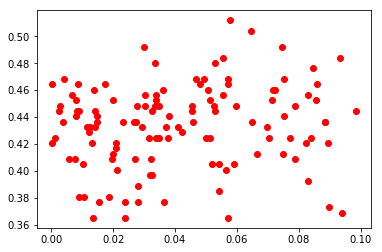

IS_BETA OOS_SHARPE DIFFERENCE SLIPPAGE


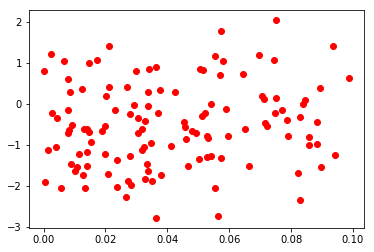

IS_BETA OOS_SHARPE


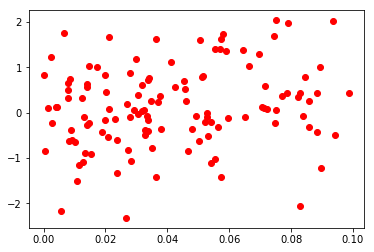

IS_BETA OOS_BETA


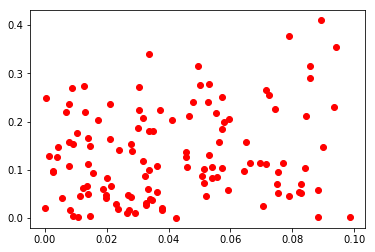

IS_BETA OOS_ANNUALIZED RETURN


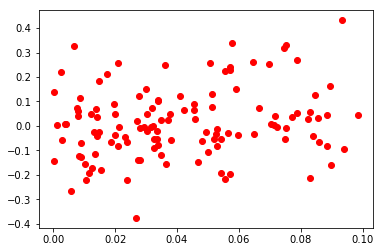

IS_BETA OOS_FACTOR SHARPE


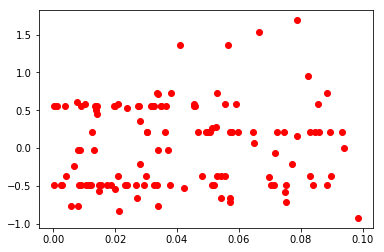

IS_EXTREME STABILITY OOS_PROFITABILITY


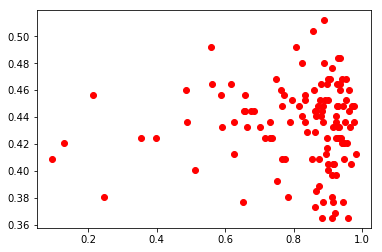

IS_EXTREME STABILITY OOS_SHARPE DIFFERENCE SLIPPAGE


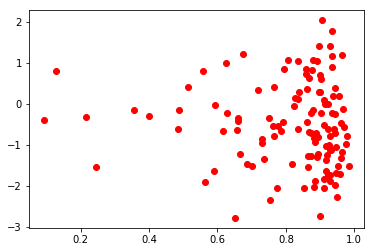

IS_EXTREME STABILITY OOS_SHARPE


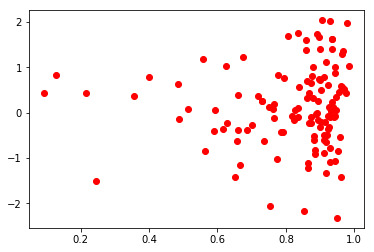

IS_EXTREME STABILITY OOS_BETA


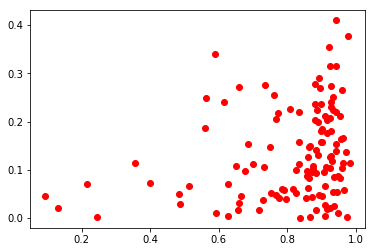

IS_EXTREME STABILITY OOS_ANNUALIZED RETURN


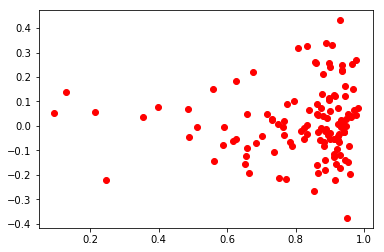

IS_EXTREME STABILITY OOS_FACTOR SHARPE


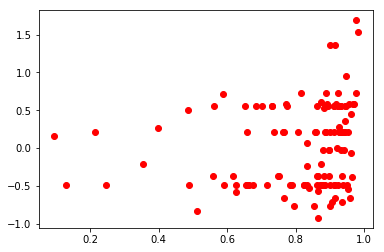

IS_EXTREME STABILITY ROLLING 600 OOS_PROFITABILITY


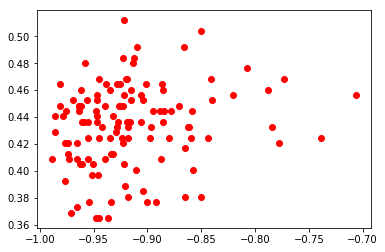

IS_EXTREME STABILITY ROLLING 600 OOS_SHARPE DIFFERENCE SLIPPAGE


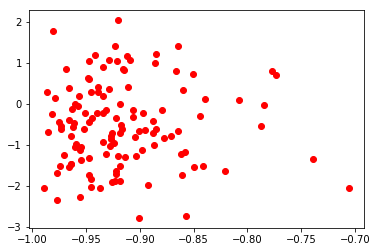

IS_EXTREME STABILITY ROLLING 600 OOS_SHARPE


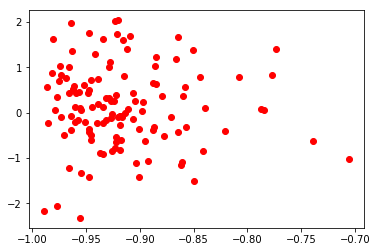

IS_EXTREME STABILITY ROLLING 600 OOS_BETA


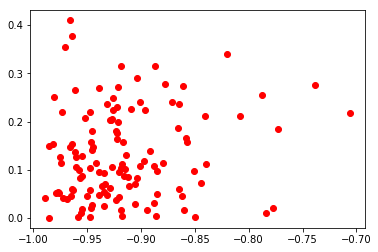

IS_EXTREME STABILITY ROLLING 600 OOS_ANNUALIZED RETURN


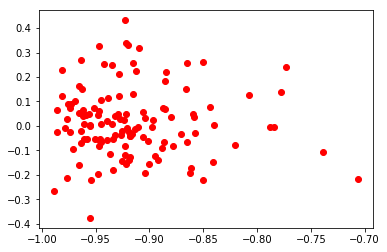

IS_EXTREME STABILITY ROLLING 600 OOS_FACTOR SHARPE
IS_FACTOR SHARPE OOS_PROFITABILITY


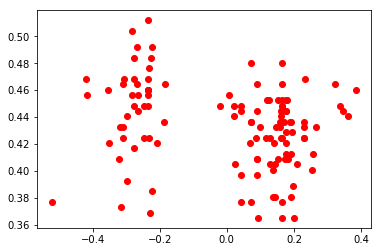

IS_FACTOR SHARPE OOS_SHARPE DIFFERENCE SLIPPAGE


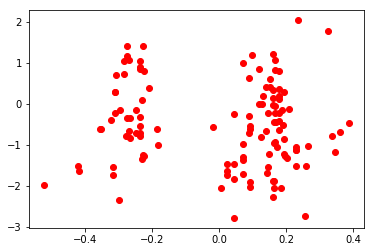

IS_FACTOR SHARPE OOS_SHARPE


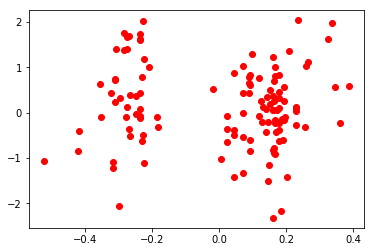

IS_FACTOR SHARPE OOS_BETA


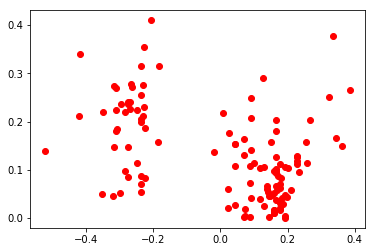

IS_FACTOR SHARPE OOS_ANNUALIZED RETURN


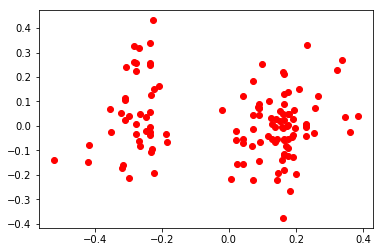

IS_FACTOR SHARPE OOS_FACTOR SHARPE


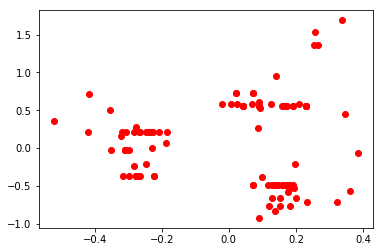

IS_MIN ROLLING SHARPE OOS_PROFITABILITY


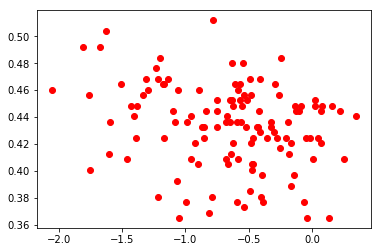

IS_MIN ROLLING SHARPE OOS_SHARPE DIFFERENCE SLIPPAGE


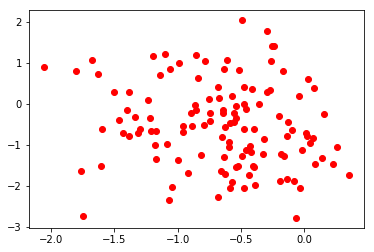

IS_MIN ROLLING SHARPE OOS_SHARPE


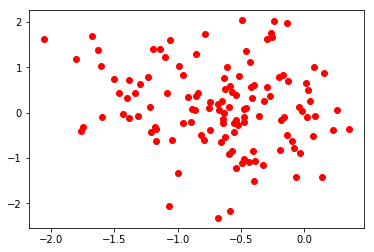

IS_MIN ROLLING SHARPE OOS_BETA


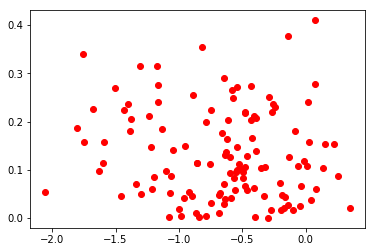

IS_MIN ROLLING SHARPE OOS_ANNUALIZED RETURN


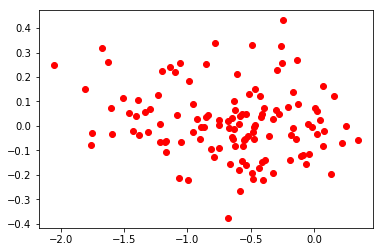

IS_MIN ROLLING SHARPE OOS_FACTOR SHARPE


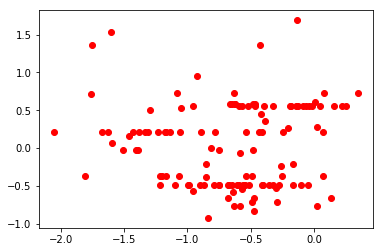

IS_ONE STD SHARPE OOS_PROFITABILITY


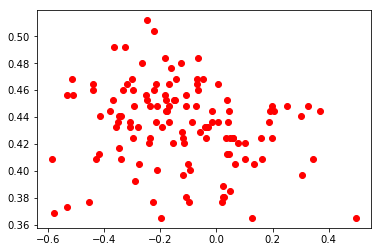

IS_ONE STD SHARPE OOS_SHARPE DIFFERENCE SLIPPAGE


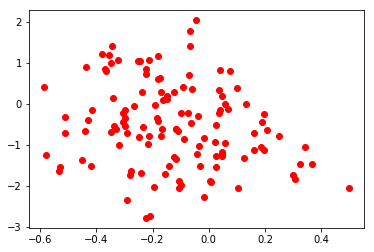

IS_ONE STD SHARPE OOS_SHARPE


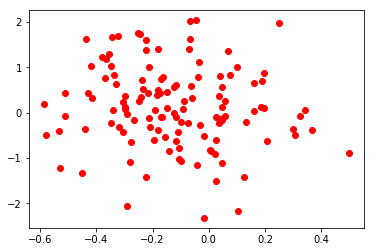

IS_ONE STD SHARPE OOS_BETA


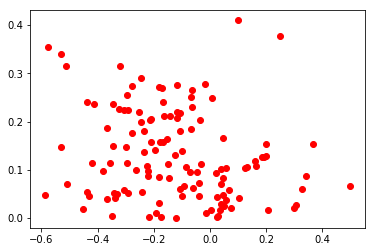

IS_ONE STD SHARPE OOS_ANNUALIZED RETURN


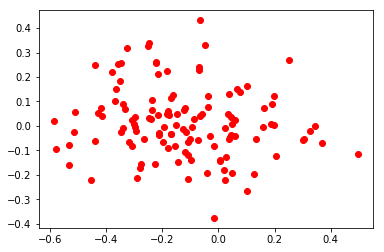

IS_ONE STD SHARPE OOS_FACTOR SHARPE


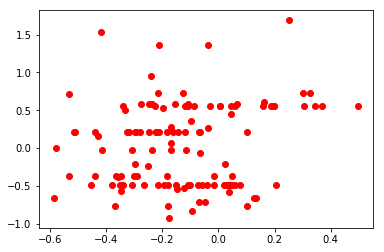

IS_PROFITABILITY OOS_PROFITABILITY


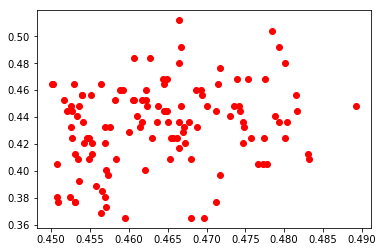

IS_PROFITABILITY OOS_SHARPE DIFFERENCE SLIPPAGE


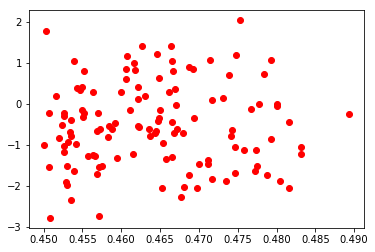

IS_PROFITABILITY OOS_SHARPE


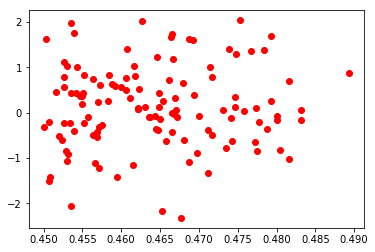

IS_PROFITABILITY OOS_BETA


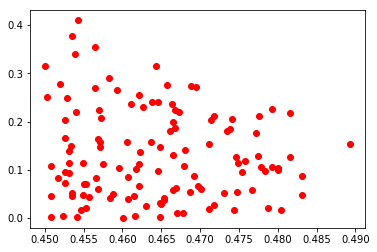

IS_PROFITABILITY OOS_ANNUALIZED RETURN


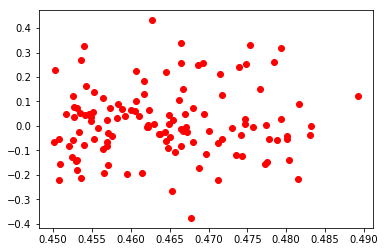

IS_PROFITABILITY OOS_FACTOR SHARPE


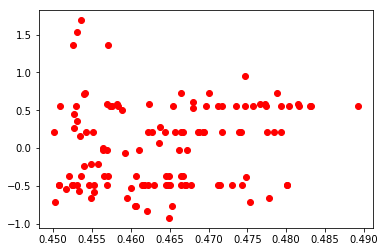

IS_PROFITABILITY SLIPPAGE OOS_PROFITABILITY


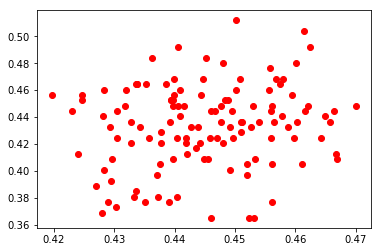

IS_PROFITABILITY SLIPPAGE OOS_SHARPE DIFFERENCE SLIPPAGE


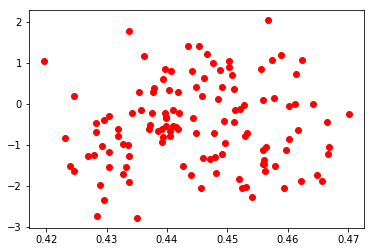

IS_PROFITABILITY SLIPPAGE OOS_SHARPE


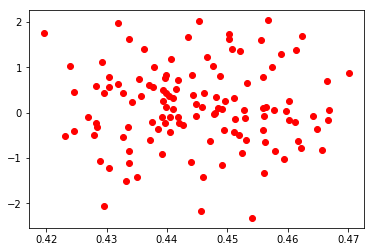

IS_PROFITABILITY SLIPPAGE OOS_BETA


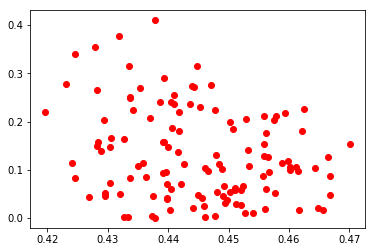

IS_PROFITABILITY SLIPPAGE OOS_ANNUALIZED RETURN


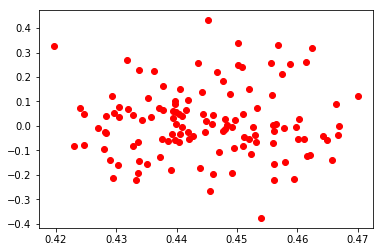

IS_PROFITABILITY SLIPPAGE OOS_FACTOR SHARPE


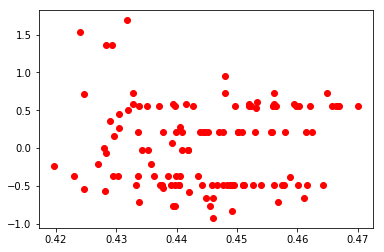

IS_RAW BETA OOS_PROFITABILITY


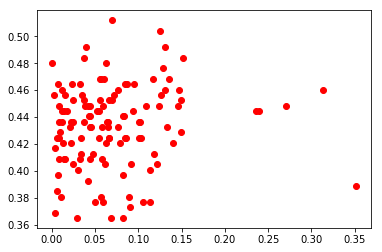

IS_RAW BETA OOS_SHARPE DIFFERENCE SLIPPAGE


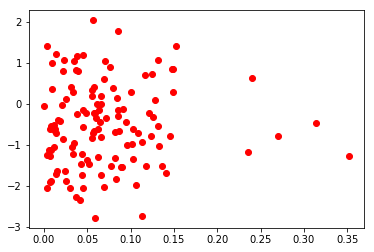

IS_RAW BETA OOS_SHARPE


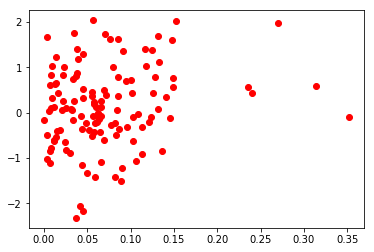

IS_RAW BETA OOS_BETA


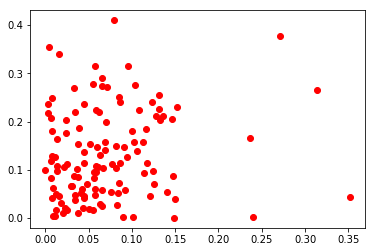

IS_RAW BETA OOS_ANNUALIZED RETURN


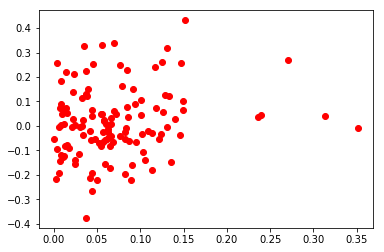

IS_RAW BETA OOS_FACTOR SHARPE


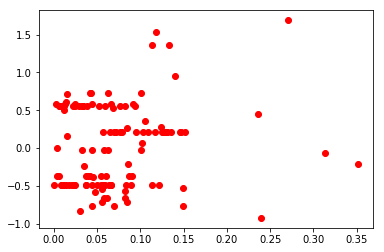

IS_RELATIVE SHARPE OOS_PROFITABILITY


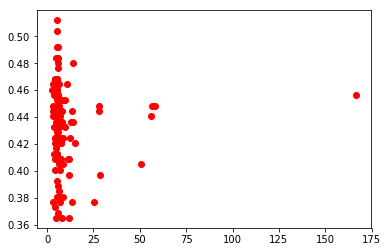

IS_RELATIVE SHARPE OOS_SHARPE DIFFERENCE SLIPPAGE


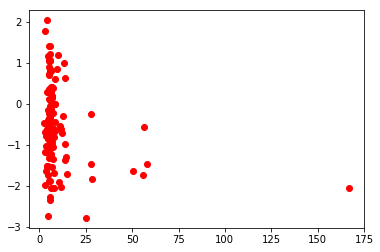

IS_RELATIVE SHARPE OOS_SHARPE


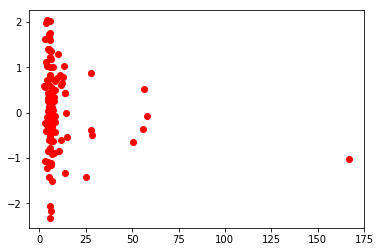

IS_RELATIVE SHARPE OOS_BETA


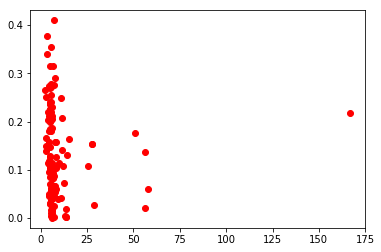

IS_RELATIVE SHARPE OOS_ANNUALIZED RETURN


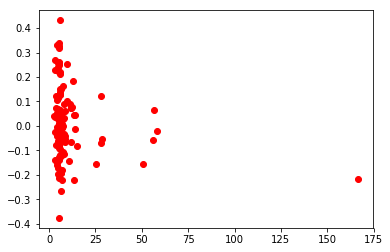

IS_RELATIVE SHARPE OOS_FACTOR SHARPE


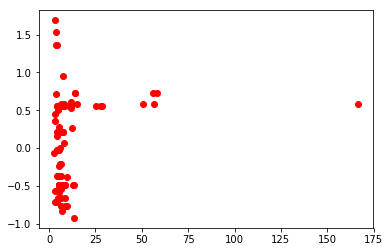

IS_RELATIVE SHARPE DIFFERENCE AVERAGE OOS_PROFITABILITY


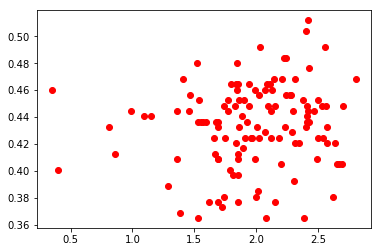

IS_RELATIVE SHARPE DIFFERENCE AVERAGE OOS_SHARPE DIFFERENCE SLIPPAGE


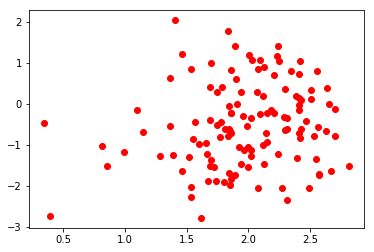

IS_RELATIVE SHARPE DIFFERENCE AVERAGE OOS_SHARPE


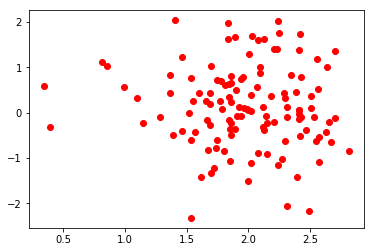

IS_RELATIVE SHARPE DIFFERENCE AVERAGE OOS_BETA


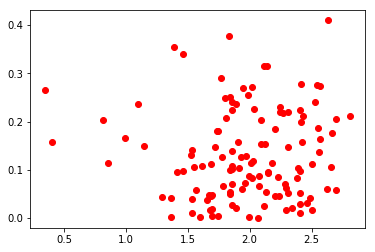

IS_RELATIVE SHARPE DIFFERENCE AVERAGE OOS_ANNUALIZED RETURN


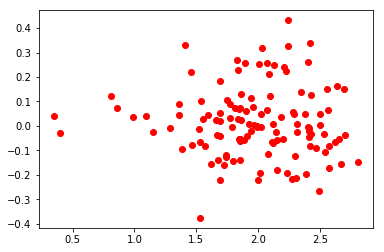

IS_RELATIVE SHARPE DIFFERENCE AVERAGE OOS_FACTOR SHARPE


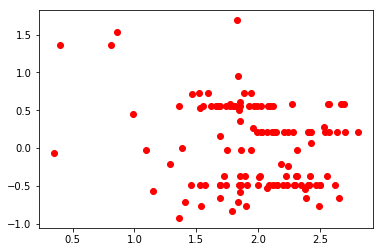

IS_RELATIVE SHARPE DIFFERENCE GREATER THAN 0 OOS_PROFITABILITY


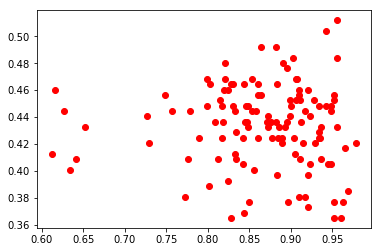

IS_RELATIVE SHARPE DIFFERENCE GREATER THAN 0 OOS_SHARPE DIFFERENCE SLIPPAGE


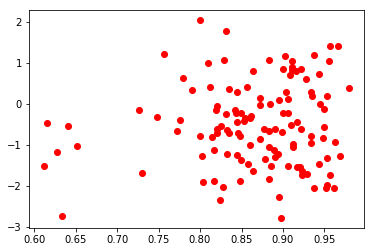

IS_RELATIVE SHARPE DIFFERENCE GREATER THAN 0 OOS_SHARPE


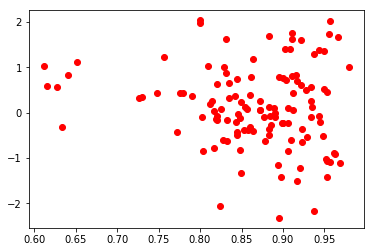

IS_RELATIVE SHARPE DIFFERENCE GREATER THAN 0 OOS_BETA


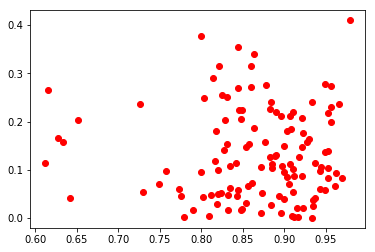

IS_RELATIVE SHARPE DIFFERENCE GREATER THAN 0 OOS_ANNUALIZED RETURN


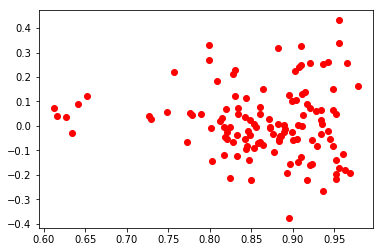

IS_RELATIVE SHARPE DIFFERENCE GREATER THAN 0 OOS_FACTOR SHARPE


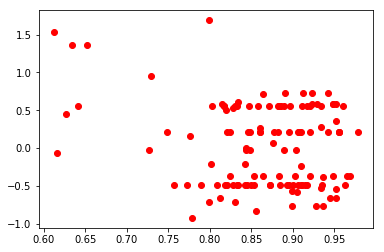

IS_RELATIVE SHARPE DIFFERENCE MIN OOS_PROFITABILITY


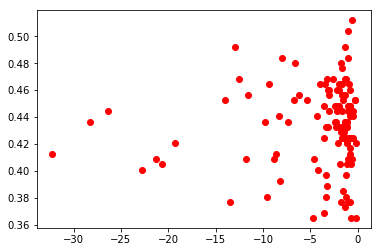

IS_RELATIVE SHARPE DIFFERENCE MIN OOS_SHARPE DIFFERENCE SLIPPAGE


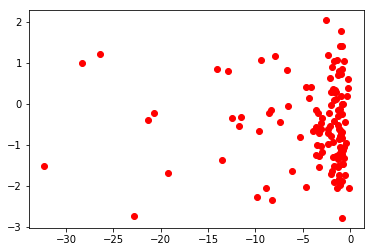

IS_RELATIVE SHARPE DIFFERENCE MIN OOS_SHARPE


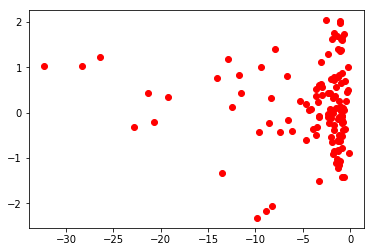

IS_RELATIVE SHARPE DIFFERENCE MIN OOS_BETA


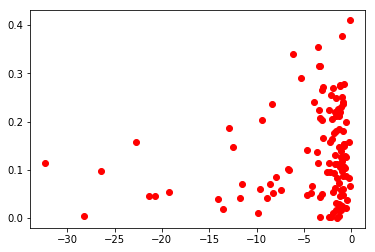

IS_RELATIVE SHARPE DIFFERENCE MIN OOS_ANNUALIZED RETURN


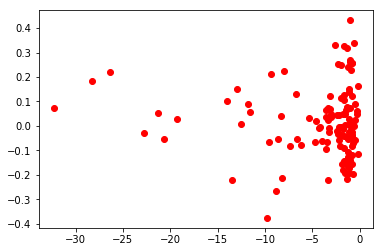

IS_RELATIVE SHARPE DIFFERENCE MIN OOS_FACTOR SHARPE


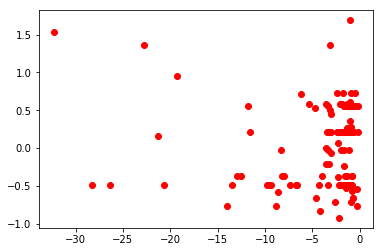

IS_RELATIVE SHARPE SLIPPAGE OOS_PROFITABILITY


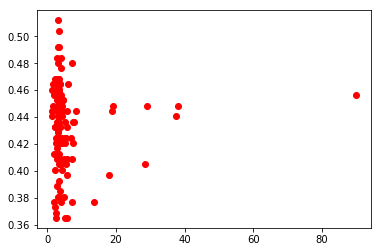

IS_RELATIVE SHARPE SLIPPAGE OOS_SHARPE DIFFERENCE SLIPPAGE


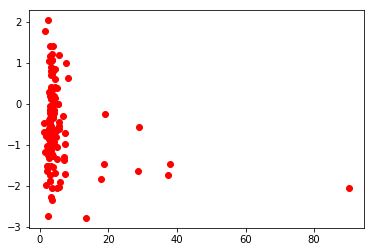

IS_RELATIVE SHARPE SLIPPAGE OOS_SHARPE


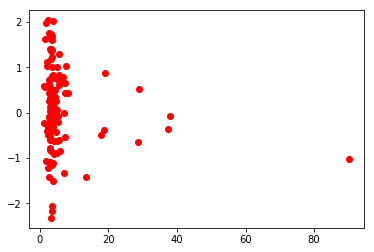

IS_RELATIVE SHARPE SLIPPAGE OOS_BETA


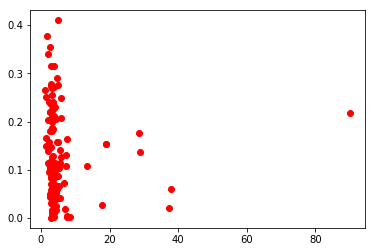

IS_RELATIVE SHARPE SLIPPAGE OOS_ANNUALIZED RETURN


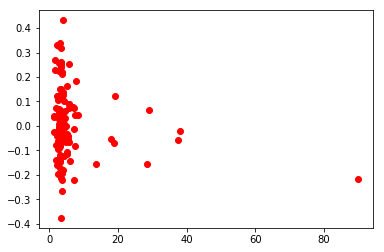

IS_RELATIVE SHARPE SLIPPAGE OOS_FACTOR SHARPE


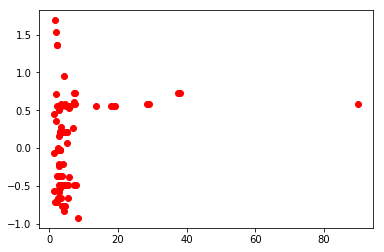

IS_ROLLING SHARPE BETA OOS_PROFITABILITY


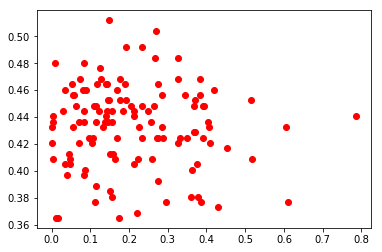

IS_ROLLING SHARPE BETA OOS_SHARPE DIFFERENCE SLIPPAGE


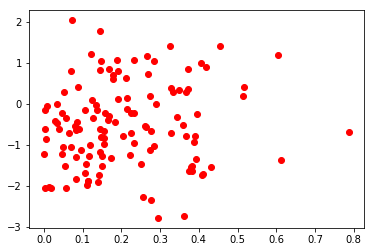

IS_ROLLING SHARPE BETA OOS_SHARPE


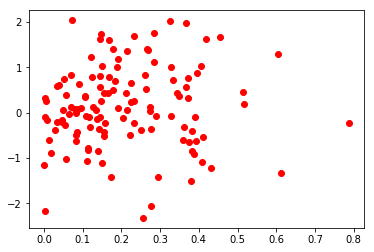

IS_ROLLING SHARPE BETA OOS_BETA


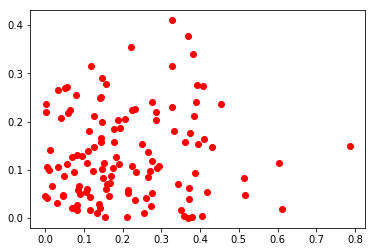

IS_ROLLING SHARPE BETA OOS_ANNUALIZED RETURN


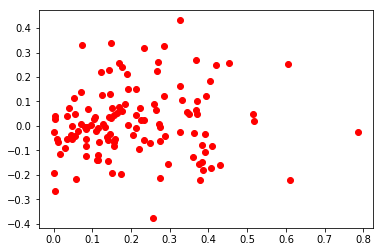

IS_ROLLING SHARPE BETA OOS_FACTOR SHARPE


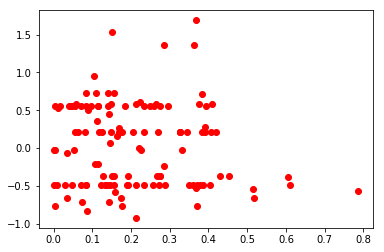

IS_ROLLING SHARPE ERROR OOS_PROFITABILITY


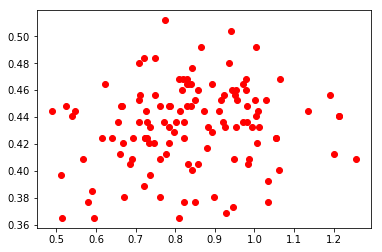

IS_ROLLING SHARPE ERROR OOS_SHARPE DIFFERENCE SLIPPAGE


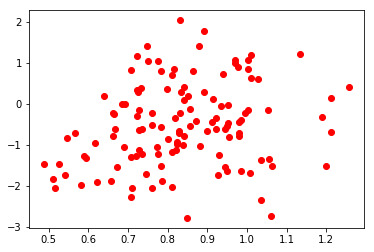

IS_ROLLING SHARPE ERROR OOS_SHARPE


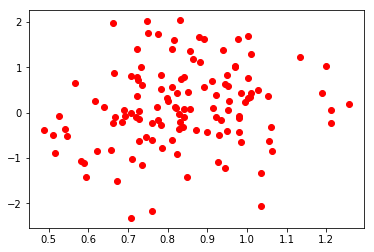

IS_ROLLING SHARPE ERROR OOS_BETA


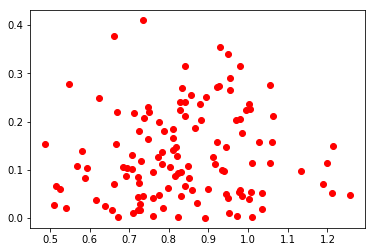

IS_ROLLING SHARPE ERROR OOS_ANNUALIZED RETURN


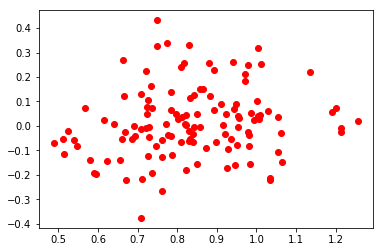

IS_ROLLING SHARPE ERROR OOS_FACTOR SHARPE


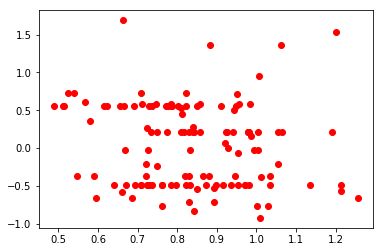

IS_ROLLING SHARPE STABILITY OOS_PROFITABILITY


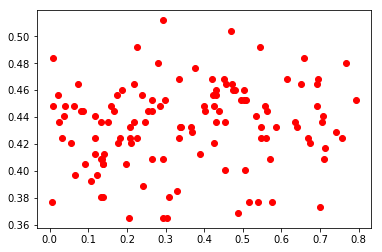

IS_ROLLING SHARPE STABILITY OOS_SHARPE DIFFERENCE SLIPPAGE


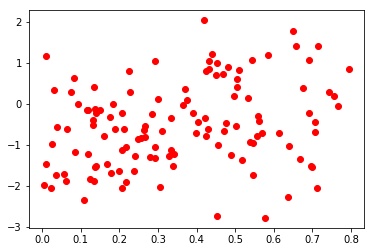

IS_ROLLING SHARPE STABILITY OOS_SHARPE


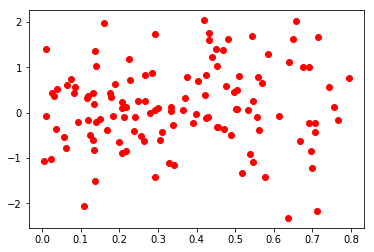

IS_ROLLING SHARPE STABILITY OOS_BETA


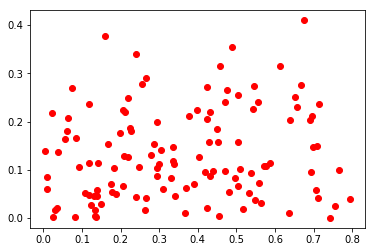

IS_ROLLING SHARPE STABILITY OOS_ANNUALIZED RETURN


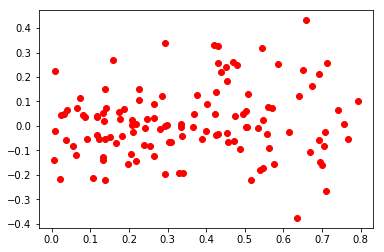

IS_ROLLING SHARPE STABILITY OOS_FACTOR SHARPE


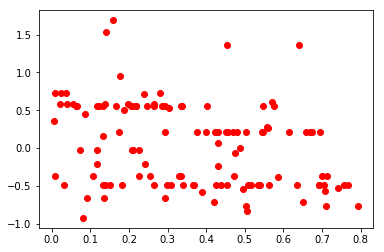

IS_SHARPE OOS_PROFITABILITY


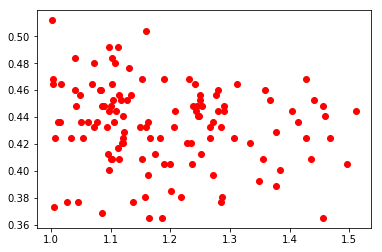

IS_SHARPE OOS_SHARPE DIFFERENCE SLIPPAGE


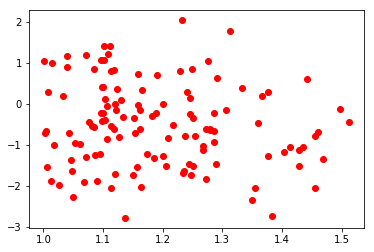

IS_SHARPE OOS_SHARPE


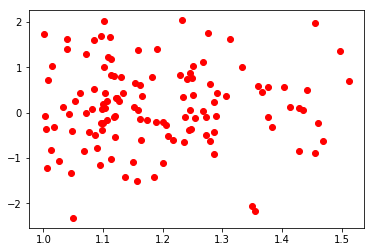

IS_SHARPE OOS_BETA


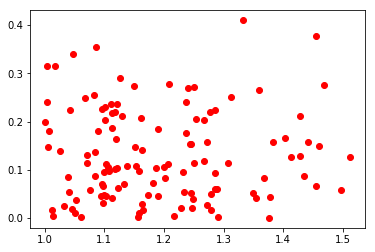

IS_SHARPE OOS_ANNUALIZED RETURN


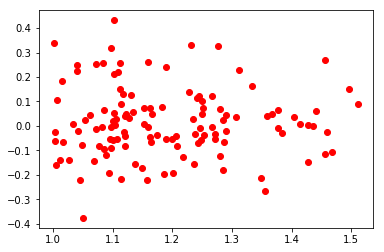

IS_SHARPE OOS_FACTOR SHARPE


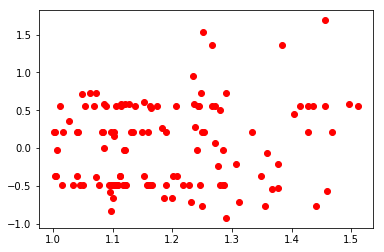

IS_SHARPE DIFFERENCE OOS_PROFITABILITY


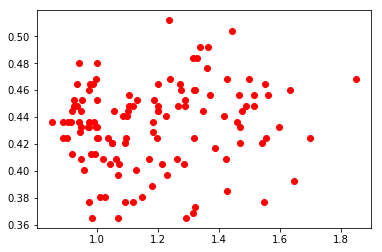

IS_SHARPE DIFFERENCE OOS_SHARPE DIFFERENCE SLIPPAGE


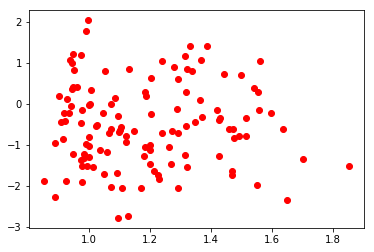

IS_SHARPE DIFFERENCE OOS_SHARPE


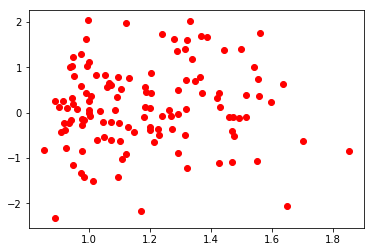

IS_SHARPE DIFFERENCE OOS_BETA


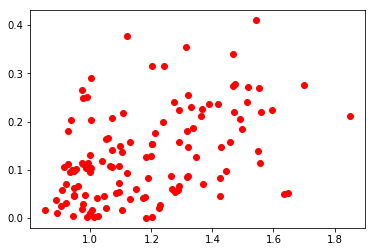

IS_SHARPE DIFFERENCE OOS_ANNUALIZED RETURN


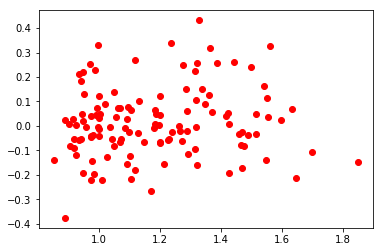

IS_SHARPE DIFFERENCE OOS_FACTOR SHARPE


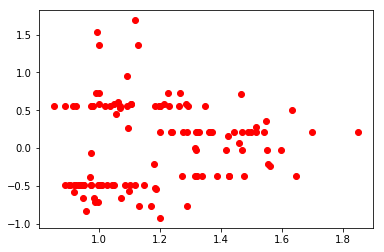

IS_SHARPE DIFFERENCE AVERAGE OOS_PROFITABILITY


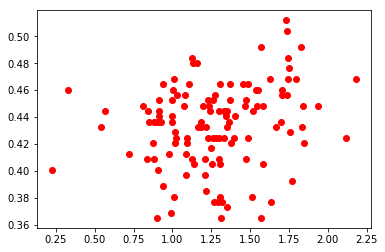

IS_SHARPE DIFFERENCE AVERAGE OOS_SHARPE DIFFERENCE SLIPPAGE


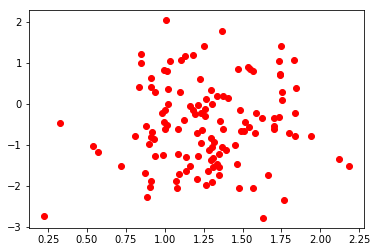

IS_SHARPE DIFFERENCE AVERAGE OOS_SHARPE


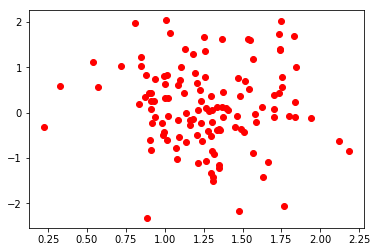

IS_SHARPE DIFFERENCE AVERAGE OOS_BETA


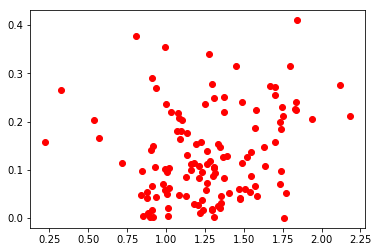

IS_SHARPE DIFFERENCE AVERAGE OOS_ANNUALIZED RETURN


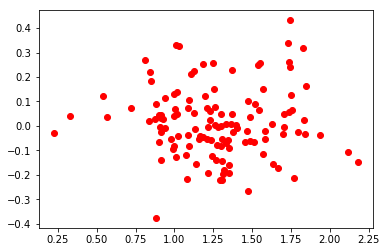

IS_SHARPE DIFFERENCE AVERAGE OOS_FACTOR SHARPE


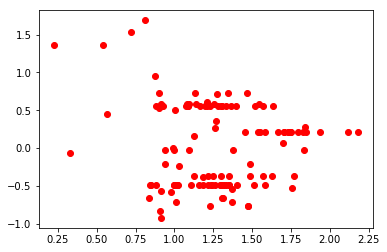

IS_SHARPE DIFFERENCE GREATER THAN 0 OOS_PROFITABILITY


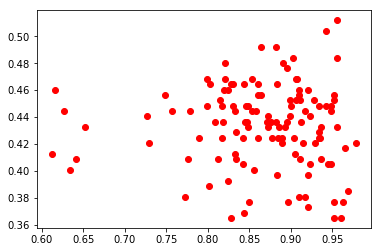

IS_SHARPE DIFFERENCE GREATER THAN 0 OOS_SHARPE DIFFERENCE SLIPPAGE


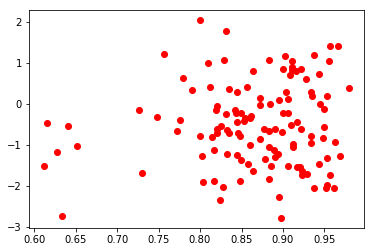

IS_SHARPE DIFFERENCE GREATER THAN 0 OOS_SHARPE


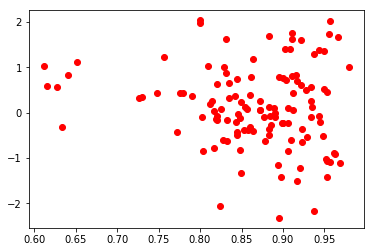

IS_SHARPE DIFFERENCE GREATER THAN 0 OOS_BETA


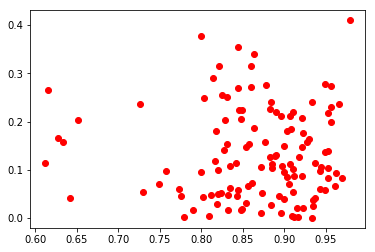

IS_SHARPE DIFFERENCE GREATER THAN 0 OOS_ANNUALIZED RETURN


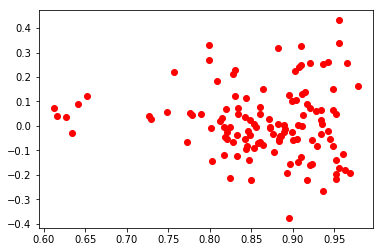

IS_SHARPE DIFFERENCE GREATER THAN 0 OOS_FACTOR SHARPE


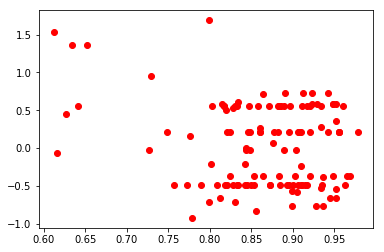

IS_SHARPE DIFFERENCE MIN OOS_PROFITABILITY


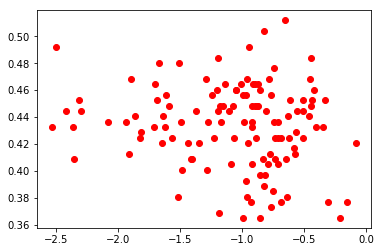

IS_SHARPE DIFFERENCE MIN OOS_SHARPE DIFFERENCE SLIPPAGE


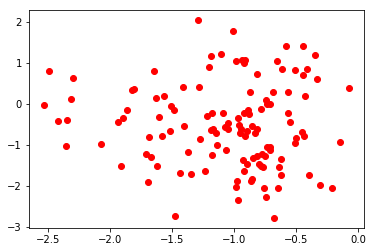

IS_SHARPE DIFFERENCE MIN OOS_SHARPE


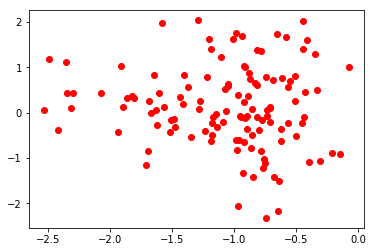

IS_SHARPE DIFFERENCE MIN OOS_BETA


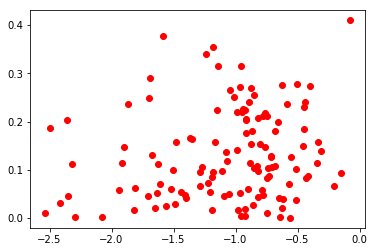

IS_SHARPE DIFFERENCE MIN OOS_ANNUALIZED RETURN


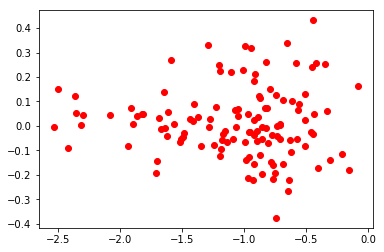

IS_SHARPE DIFFERENCE MIN OOS_FACTOR SHARPE


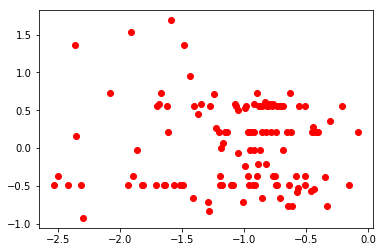

IS_SHARPE DIFFERENCE SLIPPAGE OOS_PROFITABILITY


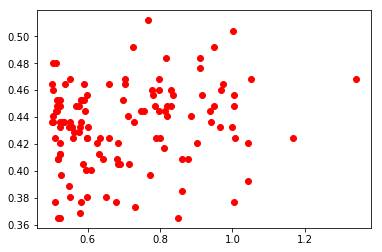

IS_SHARPE DIFFERENCE SLIPPAGE OOS_SHARPE DIFFERENCE SLIPPAGE


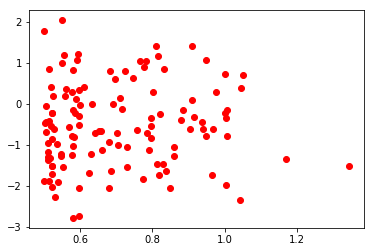

IS_SHARPE DIFFERENCE SLIPPAGE OOS_SHARPE


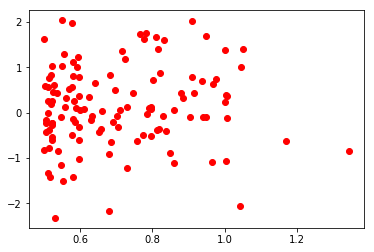

IS_SHARPE DIFFERENCE SLIPPAGE OOS_BETA


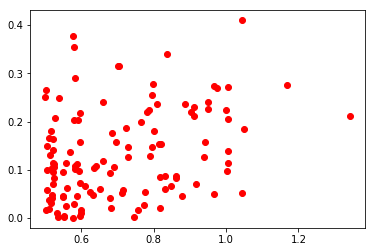

IS_SHARPE DIFFERENCE SLIPPAGE OOS_ANNUALIZED RETURN


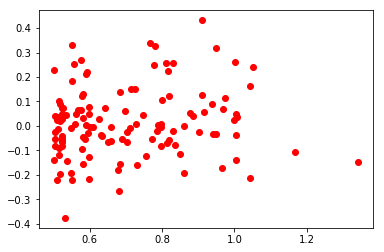

IS_SHARPE DIFFERENCE SLIPPAGE OOS_FACTOR SHARPE


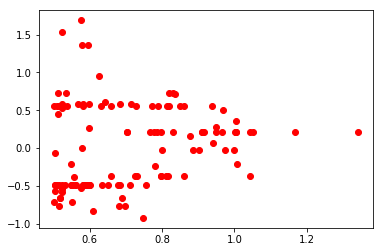

IS_SHARPE SLIPPAGE OOS_PROFITABILITY


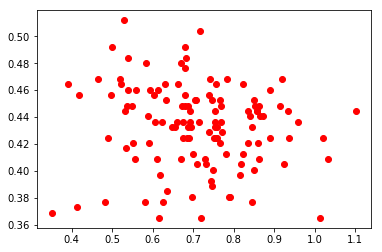

IS_SHARPE SLIPPAGE OOS_SHARPE DIFFERENCE SLIPPAGE


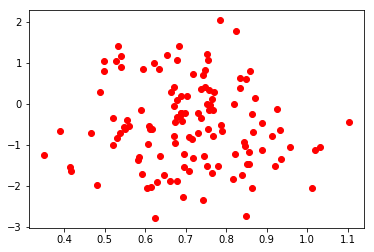

IS_SHARPE SLIPPAGE OOS_SHARPE


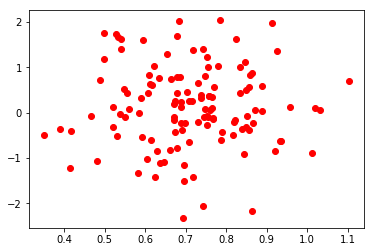

IS_SHARPE SLIPPAGE OOS_BETA


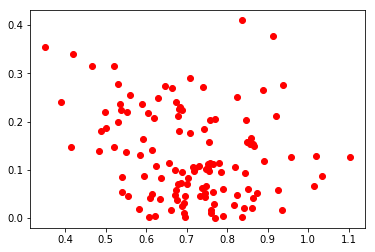

IS_SHARPE SLIPPAGE OOS_ANNUALIZED RETURN


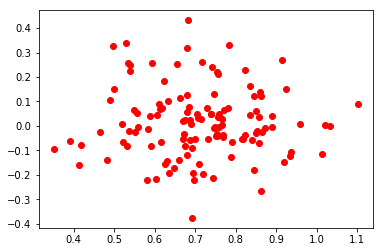

IS_SHARPE SLIPPAGE OOS_FACTOR SHARPE


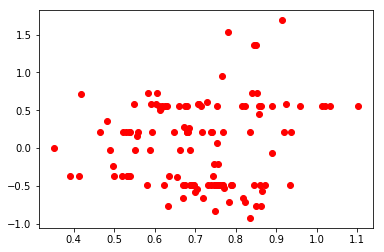

IS_SHARPE SLIPPAGE DECAY OOS_PROFITABILITY


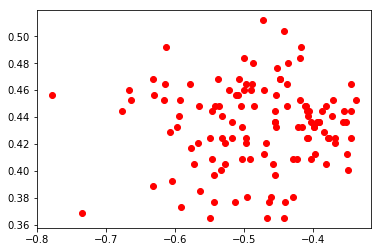

IS_SHARPE SLIPPAGE DECAY OOS_SHARPE DIFFERENCE SLIPPAGE


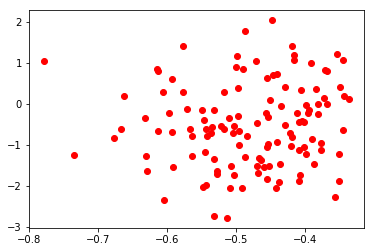

IS_SHARPE SLIPPAGE DECAY OOS_SHARPE


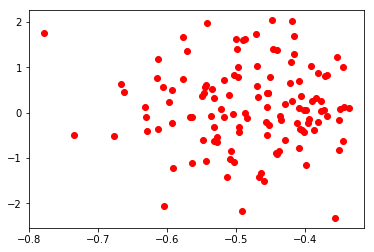

IS_SHARPE SLIPPAGE DECAY OOS_BETA


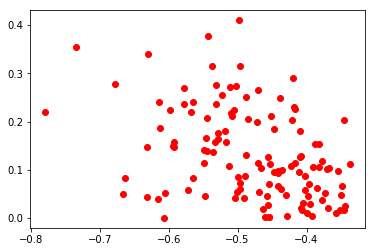

IS_SHARPE SLIPPAGE DECAY OOS_ANNUALIZED RETURN


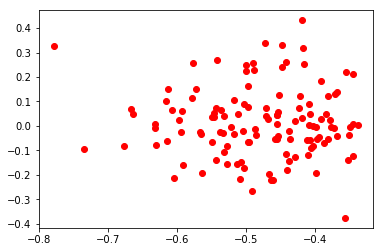

IS_SHARPE SLIPPAGE DECAY OOS_FACTOR SHARPE


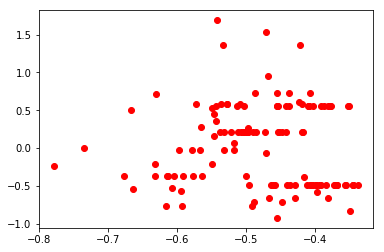

IS_SMART INFORMATION RATIO OOS_PROFITABILITY


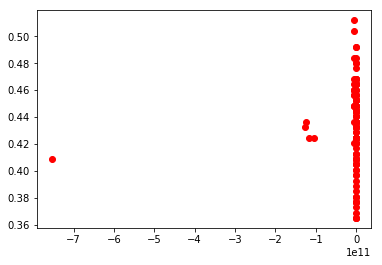

IS_SMART INFORMATION RATIO OOS_SHARPE DIFFERENCE SLIPPAGE


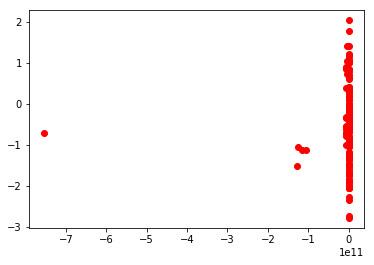

IS_SMART INFORMATION RATIO OOS_SHARPE


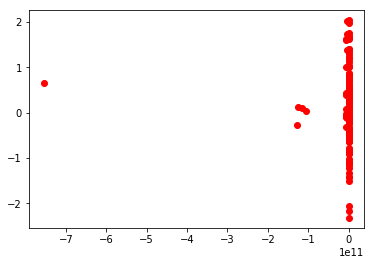

IS_SMART INFORMATION RATIO OOS_BETA


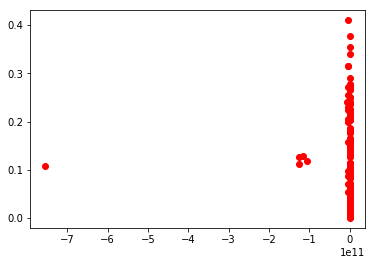

IS_SMART INFORMATION RATIO OOS_ANNUALIZED RETURN


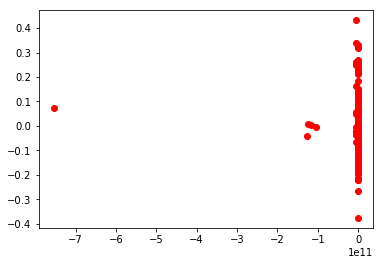

IS_SMART INFORMATION RATIO OOS_FACTOR SHARPE


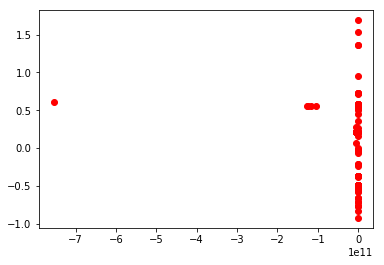

IS_STABILITY OOS_PROFITABILITY


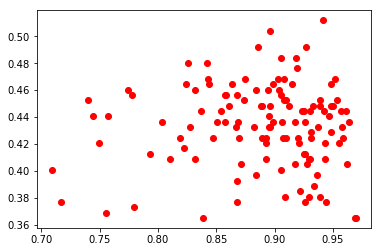

IS_STABILITY OOS_SHARPE DIFFERENCE SLIPPAGE


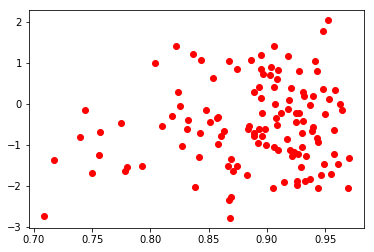

IS_STABILITY OOS_SHARPE


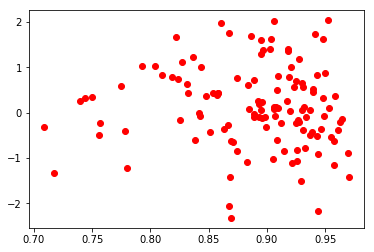

IS_STABILITY OOS_BETA


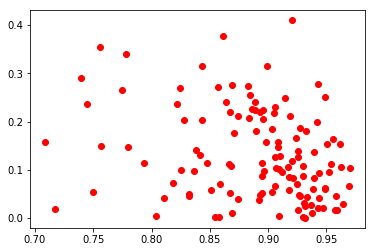

IS_STABILITY OOS_ANNUALIZED RETURN


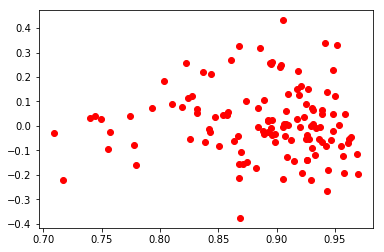

IS_STABILITY OOS_FACTOR SHARPE


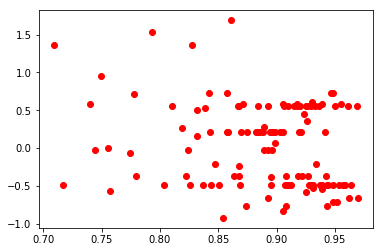

IS_TOTAL DAYS SEEN OOS_PROFITABILITY


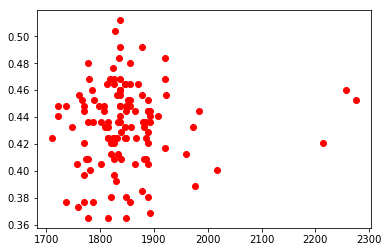

IS_TOTAL DAYS SEEN OOS_SHARPE DIFFERENCE SLIPPAGE


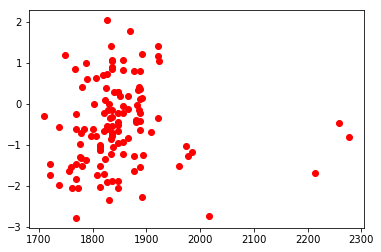

IS_TOTAL DAYS SEEN OOS_SHARPE


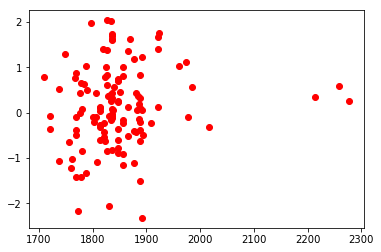

IS_TOTAL DAYS SEEN OOS_BETA


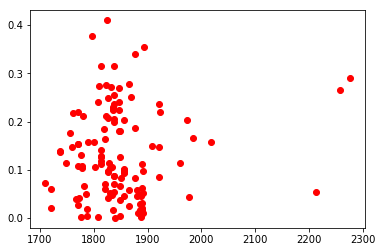

IS_TOTAL DAYS SEEN OOS_ANNUALIZED RETURN


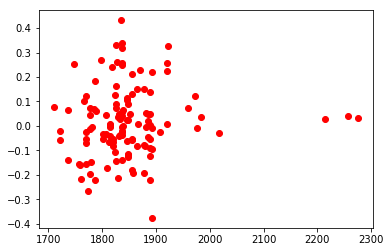

IS_TOTAL DAYS SEEN OOS_FACTOR SHARPE


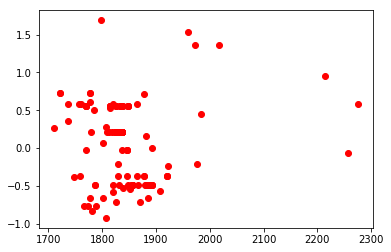

IS_TREYNOR OOS_PROFITABILITY


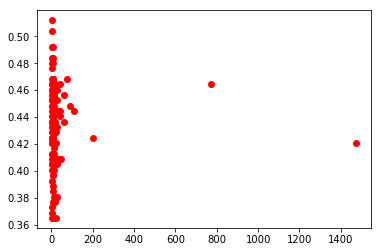

IS_TREYNOR OOS_SHARPE DIFFERENCE SLIPPAGE


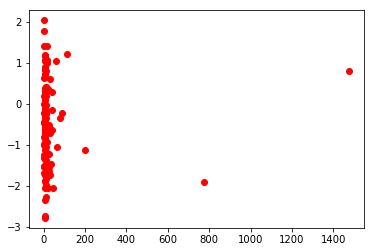

IS_TREYNOR OOS_SHARPE


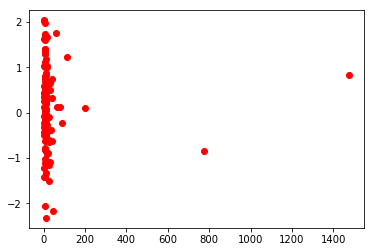

IS_TREYNOR OOS_BETA


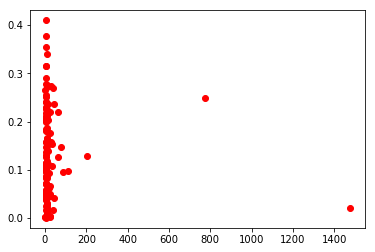

IS_TREYNOR OOS_ANNUALIZED RETURN


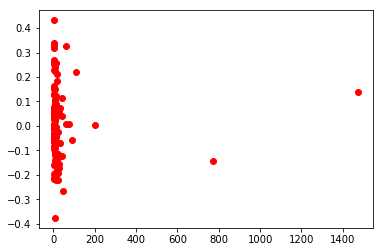

IS_TREYNOR OOS_FACTOR SHARPE


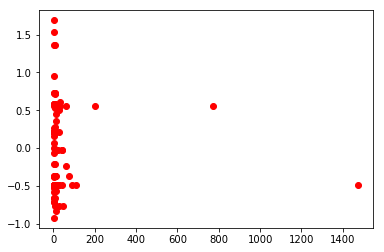

OOS_ANNUALIZED RETURN OOS_PROFITABILITY


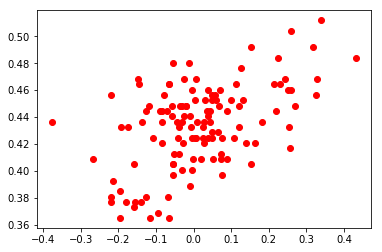

OOS_ANNUALIZED RETURN OOS_SHARPE DIFFERENCE SLIPPAGE


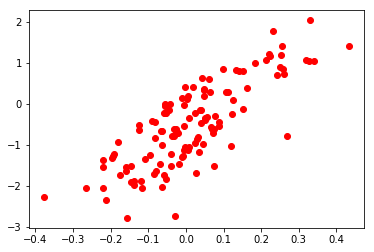

OOS_ANNUALIZED RETURN OOS_SHARPE


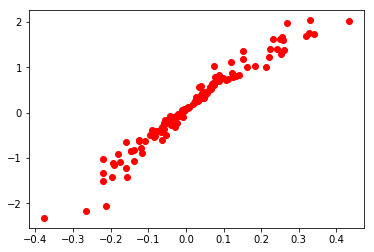

OOS_ANNUALIZED RETURN OOS_BETA


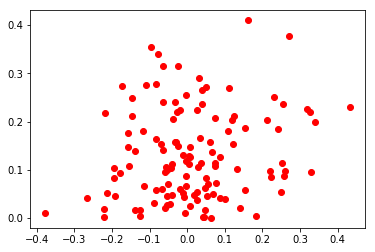

OOS_ANNUALIZED RETURN OOS_ANNUALIZED RETURN


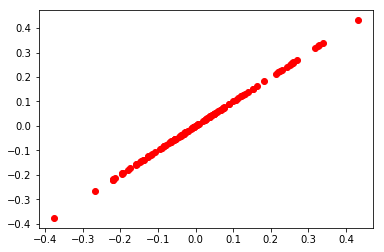

OOS_ANNUALIZED RETURN OOS_FACTOR SHARPE


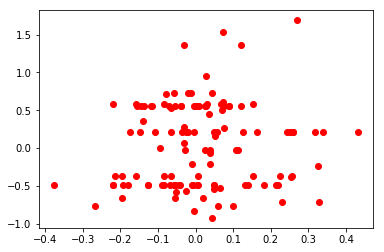

OOS_BETA OOS_PROFITABILITY


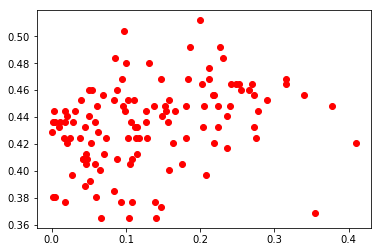

OOS_BETA OOS_SHARPE DIFFERENCE SLIPPAGE


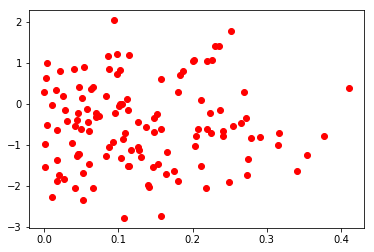

OOS_BETA OOS_SHARPE


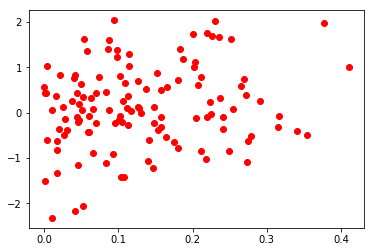

OOS_BETA OOS_BETA


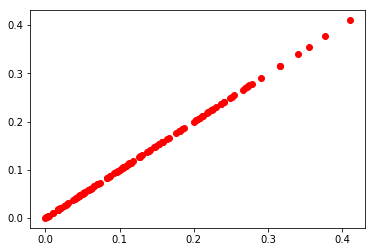

OOS_BETA OOS_ANNUALIZED RETURN


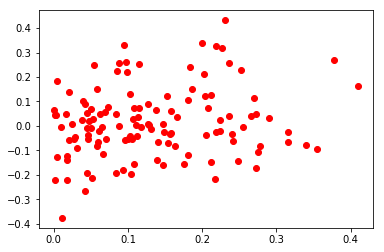

OOS_BETA OOS_FACTOR SHARPE


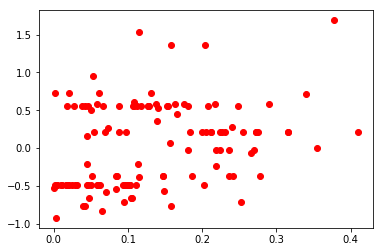

OOS_FACTOR SHARPE OOS_PROFITABILITY


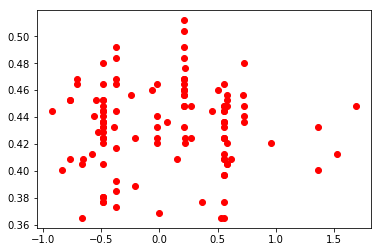

OOS_FACTOR SHARPE OOS_SHARPE DIFFERENCE SLIPPAGE


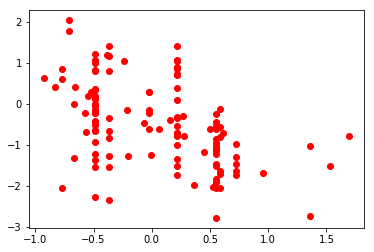

OOS_FACTOR SHARPE OOS_SHARPE


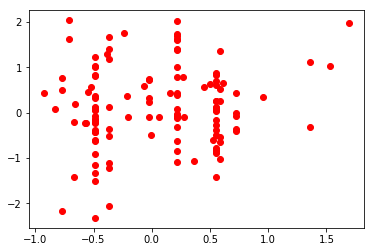

OOS_FACTOR SHARPE OOS_BETA


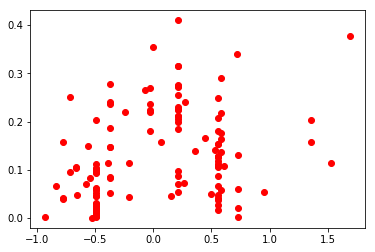

OOS_FACTOR SHARPE OOS_ANNUALIZED RETURN


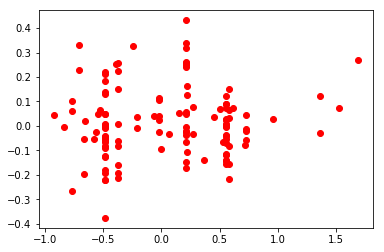

OOS_FACTOR SHARPE OOS_FACTOR SHARPE
OOS_PROFITABILITY OOS_PROFITABILITY
OOS_SHARPE OOS_PROFITABILITY
OOS_SHARPE DIFFERENCE SLIPPAGE OOS_PROFITABILITY


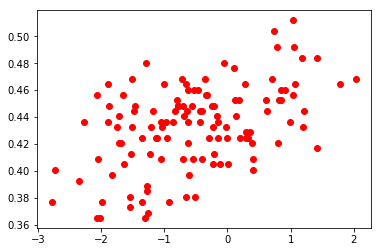

OOS_SHARPE DIFFERENCE SLIPPAGE OOS_SHARPE DIFFERENCE SLIPPAGE
combiner
OR    0.433508
Name: OOS_PROFITABILITY, dtype: float64
combiner
OR   -0.515585
Name: OOS_SHARPE DIFFERENCE SLIPPAGE, dtype: float64
combiner
OR    0.128829
Name: OOS_SHARPE, dtype: float64
combiner OOS_PROFITABILITY
model OOS_PROFITABILITY
numberOfPredictors
2    0.433508
Name: OOS_PROFITABILITY, dtype: float64
numberOfPredictors
2   -0.515585
Name: OOS_SHARPE DIFFERENCE SLIPPAGE, dtype: float64
numberOfPredictors
2    0.128829
Name: OOS_SHARPE, dtype: float64
numberOfPredictors OOS_PROFITABILITY


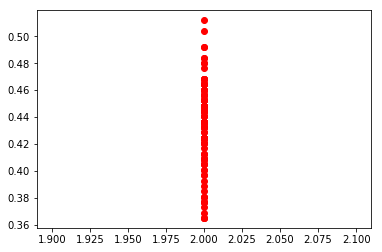

numberOfPredictors OOS_SHARPE DIFFERENCE SLIPPAGE


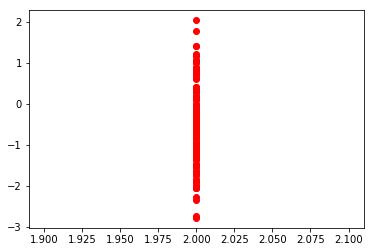

numberOfPredictors OOS_SHARPE


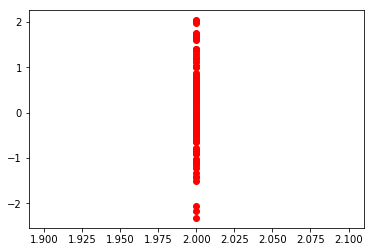

numberOfPredictors OOS_BETA


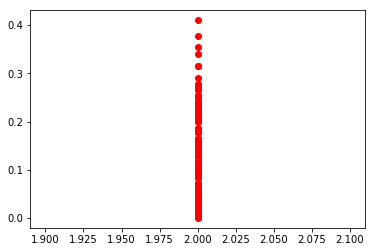

numberOfPredictors OOS_ANNUALIZED RETURN


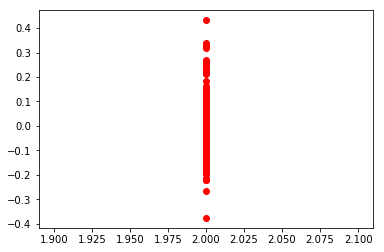

numberOfPredictors OOS_FACTOR SHARPE


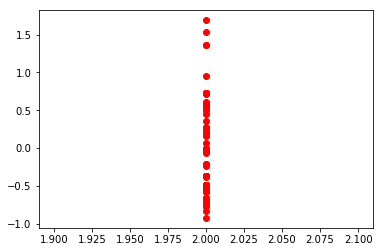

predictionLength
3    0.424603
5    0.433730
Name: OOS_PROFITABILITY, dtype: float64
predictionLength
3   -0.331566
5   -0.520186
Name: OOS_SHARPE DIFFERENCE SLIPPAGE, dtype: float64
predictionLength
3    1.079562
5    0.105060
Name: OOS_SHARPE, dtype: float64
predictionLength OOS_PROFITABILITY


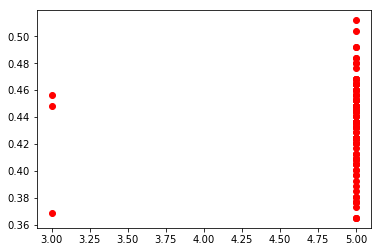

predictionLength OOS_SHARPE DIFFERENCE SLIPPAGE


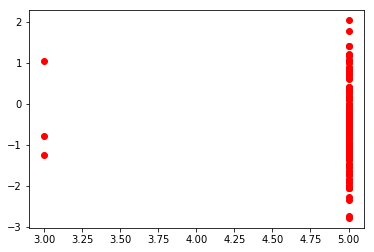

predictionLength OOS_SHARPE


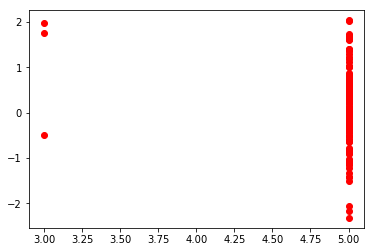

predictionLength OOS_BETA


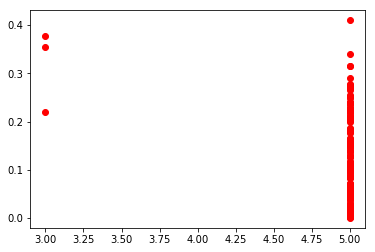

predictionLength OOS_ANNUALIZED RETURN


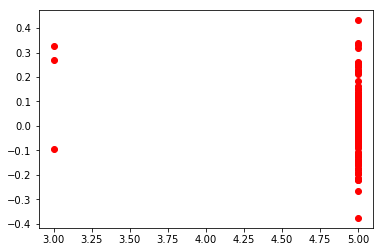

predictionLength OOS_FACTOR SHARPE


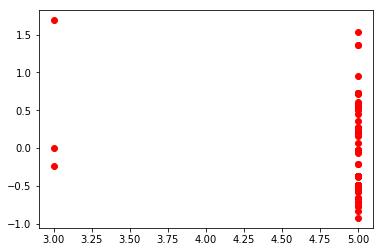

ticker
EWZ    0.431217
FXI    0.420635
GDX    0.422439
KBE    0.423611
OIH    0.446032
SLV    0.440476
USO    0.446334
VNQ    0.460317
XHB    0.444444
XLE    0.388889
XME    0.424451
XOP    0.466270
Name: OOS_PROFITABILITY, dtype: float64
ticker
EWZ   -1.150181
FXI   -1.680032
GDX   -0.187346
KBE   -1.517879
OIH    0.514110
SLV   -0.691715
USO   -0.293272
VNQ   -0.464172
XHB   -1.178579
XLE   -1.275273
XME   -1.270754
XOP    1.907163
Name: OOS_SHARPE DIFFERENCE SLIPPAGE, dtype: float64
ticker
EWZ   -0.010044
FXI    0.352114
GDX   -0.214242
KBE    0.954786
OIH    0.541045
SLV   -0.239648
USO    0.310506
VNQ    0.581875
XHB    0.560298
XLE   -0.090348
XME   -0.054087
XOP    1.826254
Name: OOS_SHARPE, dtype: float64
ticker OOS_PROFITABILITY


In [77]:
cm = pd.DataFrame(cleanedModels)
for col in cm.columns.values:
    
    try:
        import matplotlib.pyplot as plt
        groupsSharpe = cm.groupby([col])["OOS_PROFITABILITY"].mean()
        if len(groupsSharpe) < 20:
            print(groupsSharpe)
            print(cm.groupby([col])["OOS_SHARPE DIFFERENCE SLIPPAGE"].mean())
            print(cm.groupby([col])["OOS_SHARPE"].mean())
        print(col, "OOS_PROFITABILITY")
        xVals = cm[[col]].values
        yVals = cm[["OOS_PROFITABILITY"]].values
        plt.plot(xVals, yVals, 'ro')
        plt.show()
        print(col, "OOS_SHARPE DIFFERENCE SLIPPAGE")
        xVals = cm[[col]].values
        yVals = cm[["OOS_SHARPE DIFFERENCE SLIPPAGE"]].values
        plt.plot(xVals, yVals, 'ro')
        plt.show()
        
        print(col, "OOS_SHARPE")
        xVals = cm[[col]].values
        yVals = cm[["OOS_SHARPE"]].values
        plt.plot(xVals, yVals, 'ro')
        plt.show()
        
        print(col, "OOS_BETA")
        xVals = cm[[col]].values
        yVals = cm[["OOS_BETA"]].values
        plt.plot(xVals, yVals, 'ro')
        plt.show()
        
        print(col, "OOS_ANNUALIZED RETURN")
        xVals = cm[[col]].values
        yVals = cm[["OOS_ANNUALIZED RETURN"]].values
        plt.plot(xVals, yVals, 'ro')
        plt.show()
        
        print(col, "OOS_FACTOR SHARPE")
        xVals = cm[[col]].values
        yVals = cm[["OOS_FACTOR SHARPE"]].values
        plt.plot(xVals, yVals, 'ro')
        plt.show()
        plt.draw()
    except:
        continue
    



In [193]:
cm = pd.DataFrame(cleanedModels).dropna()
cmInput = cm[list(set(cm.columns.values) - set(["OOS_SHARPE DIFFERENCE", "IS_FACTOR SHARPE", "IS_RAW BETA",  "OOS_SHARPE", "OOS_SHARPE SLIPPAGE", "combiner", "ticker"]))]
cmOutput = cm[["OOS_SHARPE DIFFERENCE"]]

In [194]:
cmInput.columns

Index(['IS_EXTREME STABILITY', 'IS_ALPHA SLIPPAGE',
       'IS_25TH PERCENTILE SHARPE DIFFERENCE',
       'IS_RELATIVE SHARPE DIFFERENCE AVERAGE', 'IS_SHARPE', 'IS_TREYNOR',
       'numberOfPredictors', 'IS_SHARPE SLIPPAGE', 'IS_ANNUALIZED RETURN',
       'IS_TOTAL DAYS SEEN', 'IS_ROLLING SHARPE STABILITY',
       'IS_RELATIVE SHARPE', 'IS_SHARPE DIFFERENCE MIN',
       'IS_SMART INFORMATION RATIO', 'IS_ONE STD SHARPE',
       'IS_25TH PERCENTILE RELATIVE SHARPE DIFFERENCE',
       'IS_SHARPE DIFFERENCE SLIPPAGE', 'IS_SHARPE SLIPPAGE DECAY', 'IS_BETA',
       'IS_ACTIVITY', 'IS_25TH PERCENTILE SHARPE', 'predictionLength',
       'IS_STABILITY', 'IS_SHARPE DIFFERENCE AVERAGE', 'IS_SHARPE DIFFERENCE',
       'IS_RELATIVE SHARPE SLIPPAGE',
       'IS_RELATIVE SHARPE DIFFERENCE GREATER THAN 0',
       'IS_ROLLING SHARPE BETA', 'IS_SHARPE DIFFERENCE GREATER THAN 0',
       'IS_EXTREME STABILITY ROLLING 600', 'IS_ALPHA',
       'IS_RELATIVE SHARPE DIFFERENCE MIN', 'IS_ROLLING SHARPE ERROR',


In [195]:
cmInput

,IS_EXTREME STABILITY,IS_ALPHA SLIPPAGE,IS_25TH PERCENTILE SHARPE DIFFERENCE,IS_RELATIVE SHARPE DIFFERENCE AVERAGE,IS_SHARPE,IS_TREYNOR,numberOfPredictors,IS_SHARPE SLIPPAGE,IS_ANNUALIZED RETURN,IS_TOTAL DAYS SEEN,...,IS_SHARPE DIFFERENCE,IS_RELATIVE SHARPE SLIPPAGE,IS_RELATIVE SHARPE DIFFERENCE GREATER THAN 0,IS_ROLLING SHARPE BETA,IS_SHARPE DIFFERENCE GREATER THAN 0,IS_EXTREME STABILITY ROLLING 600,IS_ALPHA,IS_RELATIVE SHARPE DIFFERENCE MIN,IS_ROLLING SHARPE ERROR,IS_MIN ROLLING SHARPE
0,0.894353,0.024758,0.175650,0.675437,1.269128,-0.097305,2,0.724259,0.133477,1744,...,0.457949,-0.107153,0.878768,1.018918,0.878768,-0.950010,0.080945,-2.163291,0.895723,-0.354933
1,0.831139,0.006916,-0.695773,-0.129268,0.628492,0.048653,2,0.189506,0.096373,2037,...,0.186871,-0.570886,0.459686,0.387119,0.459686,-0.947509,0.081178,-18.496237,0.619889,-1.124320
2,0.948945,0.013766,-0.251761,0.272559,1.128318,-0.290330,2,0.500083,0.096603,2472,...,0.447959,-0.264972,0.639802,0.194975,0.639802,-0.973024,0.067065,-0.826170,0.490482,0.093114
3,0.900520,0.030273,0.188593,0.818705,0.956416,0.471542,2,0.551259,0.063255,1742,...,0.763158,1.852453,0.798122,0.330278,0.798122,-0.788347,0.057209,-1.470854,0.897204,-0.836832
4,0.568942,-0.033652,-1.167552,-0.388469,0.920025,-1.376700,2,-0.257625,0.098059,1948,...,0.096265,-1.312742,0.353565,0.391514,0.353565,-0.880023,0.093587,-1.600322,0.675868,-0.996843
5,0.966962,-0.125269,-0.560736,-0.211856,0.913847,-0.181762,2,-0.277751,0.131777,1876,...,-0.126452,-1.266991,0.372923,0.330115,0.372923,-0.934339,0.049775,-5.116117,0.793027,-0.868487
6,0.900418,-0.005503,-0.856553,-0.394172,0.816747,-3.541779,2,0.333819,0.022518,1875,...,-0.425210,-0.731215,0.308498,0.267199,0.308498,-0.964373,0.007951,-2.673433,0.862157,-0.405936
7,0.830910,0.025786,-0.467776,-0.144367,0.782197,0.138114,2,0.318984,0.111503,2037,...,0.340576,-0.277697,0.403135,0.581515,0.403135,-0.958367,0.094991,-15.517465,0.782112,-0.734206
8,0.885403,-0.072214,-0.667763,-0.115201,0.828277,-0.203998,2,-0.015408,0.115194,1853,...,-0.060225,-1.017342,0.443196,0.737172,0.443196,-0.930605,0.049284,-25.866522,0.791972,-1.370281
9,0.578649,-0.141544,-0.777884,-0.103535,0.942719,-0.018704,2,-13.449209,0.005750,1850,...,-0.000803,-15.254259,0.428393,1.085181,0.428393,-0.934085,0.003834,-4.605931,0.985889,-1.259068


In [196]:
len(cmOutput[cmOutput > 0].dropna())/len(cmOutput.dropna())

0.3185404339250493

In [197]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [207]:
cmOutput

,OOS_SHARPE DIFFERENCE
0,-0.389076
1,-0.555811
2,0.639304
3,-0.084324
4,0.130381
5,-0.179134
6,-0.011525
7,-0.173473
8,-0.221728
9,1.328103


In [203]:
dtreg = DecisionTreeRegressor(min_samples_leaf=30).fit(cmInput[:750], cmOutput[:750])

In [204]:
tree.export_graphviz(dtreg, out_file='tree.dot')

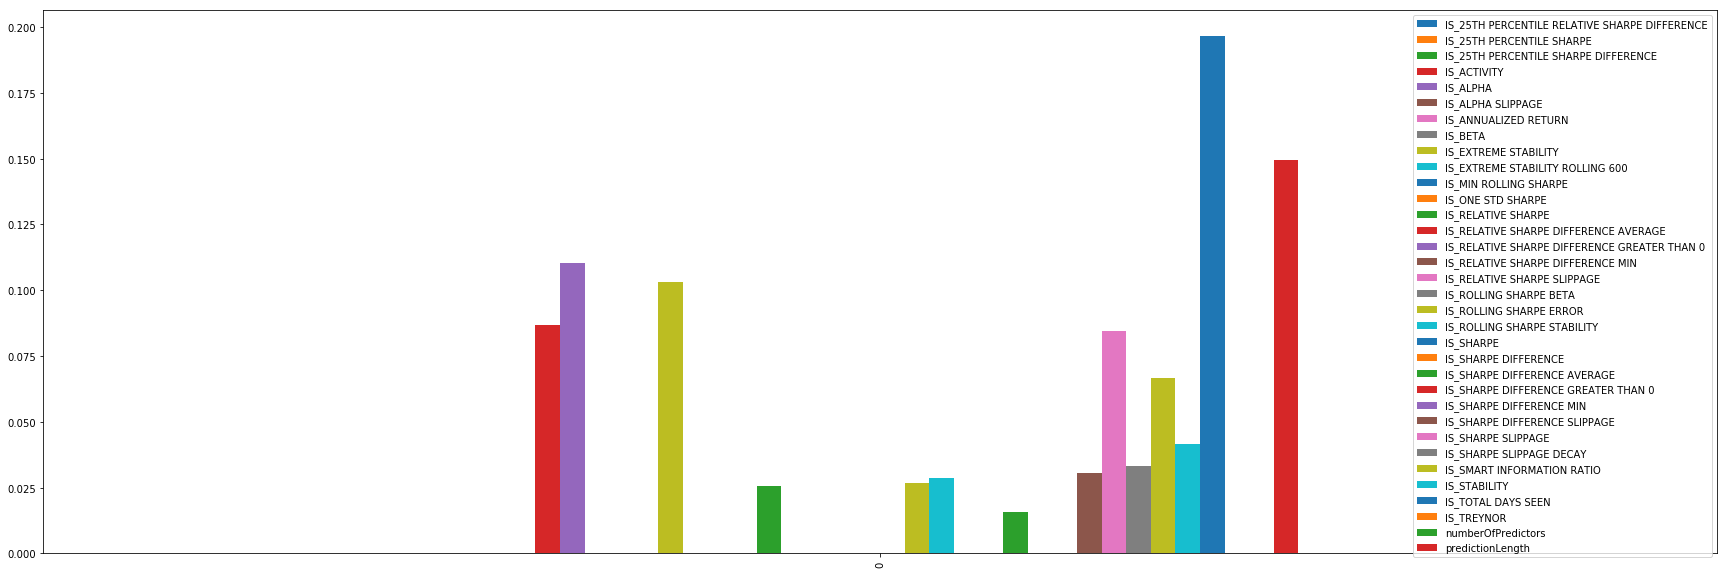

In [205]:
mapper = {}
for i in range(len(cmInput.columns)):
    mapper[cmInput.columns[i]] = dtreg.feature_importances_[i]
%matplotlib inline
pd.DataFrame([mapper]).plot.bar(figsize=(30,10))

In [208]:
pd.DataFrame(dtreg.predict(cmInput[750:]), index=cmOutput[750:].index, columns=["Predicted OOS_SHARPE DIFFERENCE"]).join(cmOutput[750:])

,Predicted OOS_SHARPE DIFFERENCE,OOS_SHARPE DIFFERENCE
751,-0.985127,-0.093945
752,0.239407,0.511387
753,0.239407,0.324767
754,-0.008772,0.716352
755,-0.423803,0.332160
756,0.078780,0.571654
757,-0.389904,0.338736
758,-0.985127,-1.035398
759,0.015560,0.228423
760,-1.334179,-1.683748
